<a href="https://colab.research.google.com/github/ArsNobilis/Trafico_Precipitaciones/blob/main/Examen_Modulo_2_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis of the subway lines of the City of Buenos Aires, Argentina.

# [1- Introduction](#Introduction)

# [2- Objective](#Objective)

# [3- Hypothesis](#Hypothesis)

# [4- Loading basic modules](#Loading_basic_modules)

# [5- Data loading and preparation](#Data_loading_and_preparation)

- ## [A- weather_ba](#weather_ba)
- ## [B- turnstiles](#turnstiles)
    - ### [B.1- turnstiles_2019](#turnstiles_2019)
    - ### [B.2- turnstiles_2018](#turnstiles_2018)
    - ### [B.3- turnstiles_2017](#turnstiles_2017)
    - ### [B.4- df_2017, df_2018, df_2019 concatenation](#turnstiles_2017_2019)
- ## [C- subway_stations](#subway_stations)    
- ## [D- df_subway, df_subway_stations concatenation](#subway_concatenation)    

# [6- Data analysis and visualizations](#Data_analysis_and_visualizations)

- ## [A- General data analysis of subway travels](#General_data_analysis_of_subway_travels)
    - ### [A.1- Number of travels: years and months](#Number_of_travels_years_and_months)
        - #### [A.1.1- Number of travels made between the years 2017-2019](#Number_of_travels_made_between_the_years_2017-2019)
        - #### [A.1.2- Number of travels per year](#Number_of_travels_per_year)
        - #### [A.1.3- Number of travels per month between the years 2017](#Number_of_travels_per_month_between_the_years_2017)
        - #### [A.1.4- Number of travels per month for each year](#Number_of_travels_per_month_for_each_year)
    - ### [A.2- Number of travels: weekday and weekend](#Number_of_travels_weekday_and_weekend)
    - ### [A.3- Number of travels: subway line](#Number_of_travel_subway_line)
        - #### [A.3.1- Number of travels per subway line between the years 2017-2019](#Number_of_travels_per_subway_line_between_the_years_2017-2019)
        - #### [A.3.2- Number of travels per subway line for each year](#Number_of_travels_per_subway_line_for_each_year)
    - ### [A.4- Number of travels: weekdays](#Number_of_travels_weekdays)
        - #### [A.4.1- Number of travels for each weekday of the period 2017-2019](#Number_of_travels_for_each_weekday_of_the_period_2017-2019)
        - #### [A.4.2- Number of travels for each weekday for each year](#Number_of_travels_for_each_weekday_for_each_year)
        - #### [A.4.3- Number of travels for each weekend of the period 2017-2019](#Number_of_travels_for_each_weekend_of_the_period_2017-2019)
    - ### [A.5- Number of travels: Rush hour](#Number_of_travels_Rush_hour)
        - #### [A.5.1- For all lines](#For_all_lines)
        - #### [A.5.2- For each station](#For_each_station)
        - #### [A.5.3- Each station for each weekday](#Each_station_for_each_weekday)
        - #### [A.5.4- Morning rush hour](#Morning_rush_hour)
        - #### [A.5.5- Evening rush hour](#Evening_rush_hour)
- ## [B- Generalanalysis of precipitations](#General_analysis_of_precipitations)   
    - ### [B.1- Precipitations per year](#Precipitations_per_year)
    - ### [B.2- Precipitations per month](#Precipitations_per_month)

# [7- Correlation analysis](#Correlation_analysis)

- ## [A- Correlation between all dataframe variables](#Correlation_between_all_dataframe_variables)
- ## [B- Correlation between total trips and the rest of the numerical variables](#Correlation_between_total_trips_and_the_rest_of_the_numerical_variables)
- ## [C- Correlation between with that has the highest flow of trips: Constitucion](#Corr_Constitucion)
- ## [D- Correlation with scatter plot](#Correlation_with_scatterplot)

# [8- Conclusion](#Conclusion)

<a id='Introduction'></a>

---

# 1. Introduction

The Buenos Aires Subway is the subway network of the Autonomous City of Buenos Aires (ACBA), consisting of six lines -A, B, C, D, E and H- with a total length of 62.8 km (of which 56.7 km are for commercial service)$^1$ and 90 stations in operation. The system also includes a tramway with two branches, the Premetro. The network is owned by Subterráneos de Buenos Aires Sociedad del Estado, a local government company. Since 2021, the subway is concessioned by the company Emova. Between 1994 and that year the concession was granted to Metrovías.

<img src = "lineas_subte.jpeg" width = 1000 height = 1000 />


In 2019 the subway network of the City of Buenos Aires transported about 325 million passengers. In 2020 it transported 74 million passengers; this sharp drop was due to the impact of the COVID-19 pandemic in Argentina, where restrictions and temporary closure of stations were a determining factor.

Despite this ACBA behaves, due to the number of residents and migrant population of the conurbation of the province of Buenos Aires, as a large city comparable to other major world capitals. 

Seasonally, weather is a strong variant in mobility decisions in large cities. In this sense, it would be useful to consider the influence of climatic changes (especially precipitation) on the flow of passengers in the Buenos Aires subway system. This information could be useful when deciding, for example, to modify the frequency of services.

1. https://www.buenosaires.gob.ar/noticias/conoce-como-evoluciono-la-forma-de-construir-los-subtes-en-sus-102-anos-de-historia
2. https://www.buenosaires.gob.ar/subte/mapa-y-combinaciones

<a id='Objective'></a>

---

# 2. Objective

To analyze the impact of precipitation on the flow of trips in the SUBTE during a non-pandemic period (it was decided to take the years 2017-2019) and to see the influence of climate on this aspect with the objective, ultimately, of collaborating with urban transport planning and design entities, in order to facilitate the transfer of passengers in the city.

First, the passenger flow was analyzed during this period in depth in order to have a more detailed picture of the distribution of trips according to this time frame, by line and working day condition. 

Subsequently, the precipitation condition was analyzed during the same period of time.

Finally, both variables were correlated to determine the impact of weather (precipitation) on SUBTE trips.

<a id='Hypothesis'></a>

---

# 3. Hypothesis

- There is an increase in the flow of passengers transported on the subway on days when there is precipitation.

- There is a seasonal variation in the flow of passengers and that they are affected on days when there is precipitation.

- There is a variation between working and non-working days in the flow of passengers and they are affected on rainy days.

<a id='Loading_basic_modules'></a>

---

# 4. Loading basic modules

In [1]:
# Common Python libraries
import pandas as pd
import numpy as np
import datetime as dt
from numpy import sqrt, pi, exp

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Statistical Analysis
from scipy import stats
import statsmodels.stats as sm

<a id='Data_loading_and_preparation'></a>

---

# 5. Data loading and preparation

The datasets were obtained from the following links:

    - Weather: https://www.ncei.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:AR000875850/detail
    - Subway stations: https://data.buenosaires.gob.ar/dataset/bocas-subte 
        -Location of each of the subway entrances, a subway station can have different entrances
    - Subway turnstiles: https://data.buenosaires.gob.ar/dataset/subte-viajes-molinetes

In [2]:
weather_ba = "clima_ba.csv"
historic_precip = "Historico_precipitaciones.csv"
subway_stations = "bocas_de_subte.csv"
turnstiles_2017 = "molinetes_2017.csv"
turnstiles_2018 = "molinetes_2018.csv"
turnstiles_2019 = "molinetes_2019.csv"

<a id='weather_ba'></a>

## A. weather_ba

In [3]:
df_weather = pd.read_csv(weather_ba, parse_dates = ["DATE"])

In [4]:
df_weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,AR000875850,"BUENOS AIRES OBSERV, AR",-34.583,-58.483,25.0,2000-01-01,NaN,NaN,NaN,88.0,68.0
1,AR000875850,"BUENOS AIRES OBSERV, AR",-34.583,-58.483,25.0,2000-01-02,NaN,NaN,NaN,87.0,69.0
2,AR000875850,"BUENOS AIRES OBSERV, AR",-34.583,-58.483,25.0,2000-01-03,NaN,NaN,NaN,87.0,67.0
3,AR000875850,"BUENOS AIRES OBSERV, AR",-34.583,-58.483,25.0,2000-01-04,NaN,NaN,NaN,89.0,71.0
4,AR000875850,"BUENOS AIRES OBSERV, AR",-34.583,-58.483,25.0,2000-01-05,NaN,NaN,NaN,91.0,72.0


In [5]:
df_weather.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
PRCP                float64
SNWD                float64
TAVG                float64
TMAX                float64
TMIN                float64
dtype: object

Column selection for final df.

In [6]:
df_weather = df_weather[["DATE", "PRCP", "TAVG", "TMAX", "TMIN"]]

In [7]:
df_weather.shape

(5553, 5)

Transformation of temperature variables (minimum, maximum and average) from Fahrenheit to Celsius.

In [8]:
temp = ["TAVG", "TMAX", "TMIN"]
for i in temp:
    df_weather[i] = ((df_weather[i] - 32) /1.8).round(2)

In [9]:
df_weather.head()

,DATE,PRCP,TAVG,TMAX,TMIN
0,2000-01-01,NaN,NaN,31.11,20.00
1,2000-01-02,NaN,NaN,30.56,20.56
2,2000-01-03,NaN,NaN,30.56,19.44
3,2000-01-04,NaN,NaN,31.67,21.67
4,2000-01-05,NaN,NaN,32.78,22.22


Transformation of the totalizations variable from inch to cm.

In [10]:
df_weather["PRCP"] = (df_weather["PRCP"] * 2.54).round(2)

Selection of the time period of the values to be analyzed (2017-2019).

In [11]:
mask_time = (df_weather["DATE"].dt.year > 2016) & (df_weather["DATE"].dt.year < 2020)
df_weather = df_weather[mask_time]

In [12]:
df_weather["DATE"].dt.year.min()

2017

In [13]:
df_weather["DATE"].dt.year.max()

2019

Deleting and reindexing the df.

In [14]:
df_weather = df_weather.reset_index()

In [15]:
df_weather = df_weather.drop("index", axis = 1)

In [16]:
df_weather.shape

(1094, 5)

Evaluation of null values

When analyzing the null values, two types of data were found:
- `null` value
- Value 0

The data of this dataset was crossed with the historical monthly totals of the National Metereological Service and was concluded that in this dataset 0 and `null` corresponded to days without rain, which is why the null values were replaced by 0. The justification is attached below.

In [17]:
df_weather.isnull().sum()

DATE      0
PRCP    713
TAVG      0
TMAX    531
TMIN     65
dtype: int64

Evaluation check examples (link dataset included)

In [18]:
mask_january17 = (df_weather["DATE"].dt.month == 1) & (df_weather["DATE"].dt.year == 2017)
df_weather_january17 = df_weather[mask_january17]

In [19]:
df_weather_january17

,DATE,PRCP,TAVG,TMAX,TMIN
0,2017-01-01,0.00,30.56,NaN,27.22
1,2017-01-02,NaN,26.11,35.56,20.56
2,2017-01-03,NaN,26.11,29.44,NaN
3,2017-01-04,NaN,25.56,NaN,22.22
4,2017-01-05,NaN,22.78,31.67,16.11
5,2017-01-06,NaN,23.33,NaN,18.89
6,2017-01-07,NaN,28.33,NaN,20.56
7,2017-01-08,3.81,25.00,34.44,21.11
8,2017-01-09,0.00,26.11,NaN,21.11
9,2017-01-10,3.00,21.11,32.22,16.11


In [20]:
df_weather_january17["PRCP"].value_counts()

0.00    6
0.20    2
3.81    1
3.00    1
1.19    1
0.89    1
Name: PRCP, dtype: int64

The number of days of precipitation for the month of January 2017 coincides with the historical data of the National Metereological Service. 

This operation was repeated for random samples with similar results, so it was decided to replace the `null` value by 0.

In [21]:
# Replacement of null values by 0

df_weather["PRCP"] = df_weather["PRCP"].replace(np.nan, 0)

In [22]:
# The year and month fields are created separately

df_weather["year"] = df_weather["DATE"].dt.year
df_weather["month"] = df_weather["DATE"].dt.month

In [23]:
# Dataset preparation to discriminate between weekday/weekend

mask_weekday = df_weather["DATE"].dt.weekday < 5
mask_weekend = df_weather["DATE"].dt.weekday >= 5
df_weather.loc[mask_weekday, "weekday"] = "yes" 
df_weather.loc[mask_weekend, "weekday"] = "no" 

In [24]:
# A list of holidays is created

holidays = ["2019-01-01", # January
            "2019-03-04", "2019-03-05", "2019-03-24", # March
            "2019-04-02", "2019-04-19", # April
            "2019-05-01", "2019-05-25", # May
            "2019-06-17", "2019-06-20", # June
            "2019-07-09", # July
            "2019-08-18", # August
            "2019-10-13", # Octuber
            "2019-11-18", # November
            "2019-12-08", "2019-12-25", # December
             
            "2018-01-01", # January
            "2018-02-12", "2018-02-12", # February
            "2018-03-24", "2018-03-29", "2018-03-30", # March
            "2018-04-02", "2018-04-30", # April
            "2018-05-01", "2018-05-25", # May
            "2018-06-17", "2018-06-20", # June
            "2018-07-09", # July
            "2018-08-20", # August
            "2018-10-15", # Octuber
            "2018-11-19", # November
            "2018-12-08", "2018-12-24", "2018-12-25", "2018-12-31",# December
             
            "2017-01-01", # January
            "2017-02-27", "2017-02-28", # February
            "2017-03-27",  # March
            "2017-04-02", "2017-04-13", "2017-04-14",# Abril
            "2017-05-01", "2017-05-25", # May
            "2017-06-17", "2017-06-19", # June
            "2017-07-09", # July
            "2017-08-21", # August
            "2017-10-16", # Octuber
            "2017-11-20", # November
            "2017-12-08", "2017-12-25" # December
             ]

# Holidays
# 2017
    # https://www.lanacion.com.ar/sociedad/feriados-puente-2017-gobierno-calendario-nid1978221/?utm_source=google-ads&campaignname=dsa-ar-superpico&utm_term=&gclid=Cj0KCQjw8uOWBhDXARIsAOxKJ2EXGvvROuFuU-RSbQI5-ioNFeq9_tgR4nUHfgMjDyjl-d8rw7ibr9IaAiVEEALw_wcB
# 2018
    # https://www.lanacion.com.ar/sociedad/feriados-2018-asi-quedo-el-calendario-nid2081185/?utm_source=google-ads&campaignname=dsa-ar-superpico&utm_term=&gclid=Cj0KCQjw8uOWBhDXARIsAOxKJ2FHPI2fVDvj9Gp1vSb9RWMmUatHF7I53ZgM_d8u-xotIFj1PW8SGGsaAkR1EALw_wcB
# 2019     
    # https://www.argentina.gob.ar/tribunalfiscal/calendario2019

In [25]:
for holiday in holidays: 
    mask_holiday = df_weather["DATE"] == holiday
    df_weather.loc[mask_holiday, "weekday"] = "no"

In [26]:
df_weather.isnull().sum()

DATE         0
PRCP         0
TAVG         0
TMAX       531
TMIN        65
year         0
month        0
weekday      0
dtype: int64

In [27]:
df_weather.head()

,DATE,PRCP,TAVG,TMAX,TMIN,year,month,weekday
0,2017-01-01,0.0,30.56,NaN,27.22,2017,1,no
1,2017-01-02,0.0,26.11,35.56,20.56,2017,1,yes
2,2017-01-03,0.0,26.11,29.44,NaN,2017,1,yes
3,2017-01-04,0.0,25.56,NaN,22.22,2017,1,yes
4,2017-01-05,0.0,22.78,31.67,16.11,2017,1,yes


<a id='turnstiles'></a>

## B. turnstiles

3 datasets are loaded referring to the number of trips per line, station and turnstile with records every 15', since the number of records exceeds $12*10^6$, it was decided to work them in a fractional way (each year separately) and group them by line and station in order to join them into a single df at the time of the analysis.

<a id='turnstiles_2019'></a>

### B.1 turnstiles_2019

In [28]:
df_turnstiles_2019 = pd.read_csv(turnstiles_2019, parse_dates = ["fecha"])

In [29]:
df_turnstiles_2019.head()

,periodo,fecha,desde,hasta,linea,molinete,estacion,pax_pagos,pax_pases_pagos,pax_franq,total
0,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Lima_N_Turn02,Lima,1.0,0.0,0.0,1.0
1,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Loria_N_Turn03,Loria,3.0,0.0,0.0,3.0
2,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Miserere_Q_HALL_Turn01,Plaza Miserere,3.0,0.0,0.0,3.0
3,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Miserere_S_Turn01,Plaza Miserere,6.0,0.0,0.0,6.0
4,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Miserere_S_Turn03,Plaza Miserere,10.0,0.0,0.0,10.0


In [30]:
np.sort(df_turnstiles_2019["estacion"].unique())

array(['9 de julio', 'Acoyte', 'AgÃ\x83Â¼ero', 'AgÃ¼ero', 'Agüero',
       'Alberti', 'Angel Gallardo', 'Avenida La Plata', 'Avenida de Mayo',
       'Boedo', 'Bolivar', 'Bulnes', 'Callao', 'Callao.B', 'Carabobo',
       'Carlos Gardel', 'Carlos Pellegrini', 'Caseros', 'Castro Barros',
       'Catalinas', 'Catedral', 'Congreso', 'Congreso de Tucuman',
       'Constitucion', 'Cordoba', 'Correo Central', 'Corrientes',
       'Diagonal Norte', 'Dorrego', 'Echeverria', 'Emilio Mitre',
       'Entre Rios', 'Facultad de Derecho', 'Facultad de Medicina',
       'Federico Lacroze', 'Flores', 'Florida', 'General Belgrano',
       'General San Martin', 'Hospitales', 'Humberto I', 'Inclan',
       'Independencia', 'Independencia.H', 'Jose Hernandez',
       'Jose Maria Moreno', 'Jujuy', 'Juramento', 'Las Heras', 'Lavalle',
       'Leandro N. Alem', 'Lima', 'Loria', 'Los Incas', 'Malabia',
       'Mariano Moreno', 'Medalla Milagrosa', 'Medrano',
       'Ministro Carranza', 'Olleros', 'Once', 'Pale

In [31]:
df_turnstiles_2019.dtypes

periodo                     int64
fecha              datetime64[ns]
desde                      object
hasta                      object
linea                      object
molinete                   object
estacion                   object
pax_pagos                 float64
pax_pases_pagos           float64
pax_franq                 float64
total                     float64
dtype: object

Column selection and row aggregation for the final df

In [32]:
# Transformation of the "desde" column from object to datetime

df_turnstiles_2019["desde"]= pd.to_datetime(df_turnstiles_2019["desde"], format = "%H:%M:%S")

In [33]:
# Selection of the necessary fields for analysis and aggregation by date, time, line and station by total pax. 

df_2019 = df_turnstiles_2019.groupby(["fecha", df_turnstiles_2019["desde"].dt.hour, "linea", "estacion"])["total"].sum().reset_index()

In [34]:
df_2019.head()

,fecha,desde,linea,estacion,total
0,2019-01-01,8,LineaA,Acoyte,37.0
1,2019-01-01,8,LineaA,Alberti,13.0
2,2019-01-01,8,LineaA,Carabobo,44.0
3,2019-01-01,8,LineaA,Castro Barros,24.0
4,2019-01-01,8,LineaA,Congreso,26.0


Null values in `df_2019`

In [35]:
df_2019.isnull().sum()

fecha       0
desde       0
linea       0
estacion    0
total       0
dtype: int64

In [36]:
df_2019.tail()

,fecha,desde,linea,estacion,total
588999,2019-12-31,22,LineaH,Once,6.0
589000,2019-12-31,22,LineaH,Santa Fe,1.0
589001,2019-12-31,23,LineaA,San Pedrito,1.0
589002,2019-12-31,23,LineaE,Avenida La Plata,1.0
589003,2019-12-31,23,LineaE,Catalinas,1.0


<a id='turnstiles_2018'></a>

### B.2 turnstiles_2018

In [37]:
df_turnstiles_2018 = pd.read_csv(turnstiles_2018, parse_dates = ["fecha"])

In [38]:
df_turnstiles_2018.head()

,fecha,desde,hasta,linea,molinete,estacion,pax_pagos,pax_pases_pagos,pax_franq,total,periodo
0,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_CBarros_S_Turn01,Castro Barros,1.0,0.0,0.0,1.0,201801
1,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_Lima_S_Turn03,Lima,4.0,0.0,0.0,4.0,201801
2,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_Pasco_Turn01,Pasco,1.0,0.0,0.0,1.0,201801
3,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_Peru_S_Turn01,Peru,4.0,0.0,0.0,4.0,201801
4,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_PJunta_S_Turn02,Primera Junta,2.0,0.0,0.0,2.0,201801


In [39]:
df_turnstiles_2018.dtypes

fecha              datetime64[ns]
desde                      object
hasta                      object
linea                      object
molinete                   object
estacion                   object
pax_pagos                 float64
pax_pases_pagos           float64
pax_franq                 float64
total                     float64
periodo                     int64
dtype: object

Column selection and row aggregation for the final df

In [40]:
df_turnstiles_2018["desde"]= pd.to_datetime(df_turnstiles_2018["desde"], format = "%H:%M:%S")

In [41]:
df_2018 = df_turnstiles_2018.groupby(["fecha", df_turnstiles_2018["desde"].dt.hour, "linea", "estacion"])["total"].sum().reset_index()

In [42]:
df_2018.head()

,fecha,desde,linea,estacion,total
0,2018-01-01,8.0,LineaA,Acoyte,27.0
1,2018-01-01,8.0,LineaA,Alberti,9.0
2,2018-01-01,8.0,LineaA,Carabobo,38.0
3,2018-01-01,8.0,LineaA,Castro Barros,33.0
4,2018-01-01,8.0,LineaA,Congreso,36.0


Null values in `df_2018`

In [43]:
df_2018.isnull().sum()

fecha       0
desde       0
linea       0
estacion    0
total       0
dtype: int64

<a id='turnstiles_2017'></a>

### B.3 turnstiles_2017

In [44]:
df_turnstiles_2017 = pd.read_csv(turnstiles_2017, encoding = "latin1", infer_datetime_format = True) # , parse_dates = ["FECHA"]

The column names are changed to lowercase.

In [45]:
columns = ["V1", "FECHA", "DESDE", "HASTA", "LINEA", "MOLINETE", "ID_ESTACION", "ESTACION", "PAX_PAGOS", "PAX_PASES_PAGOS", "PAX_FREQ", "TOTAL"]
columns = [each_string.lower() for each_string in columns]

df_turnstiles_2017 .columns = columns

In [46]:
df_turnstiles_2017 .head()

,v1,fecha,desde,hasta,linea,molinete,id_estacion,estacion,pax_pagos,pax_pases_pagos,pax_freq,total
0,1,01/01/2017,08:00:00,08:15:00,D,LINEA_D_9JULIO_S_TURN02,6,9 DE JULIO,1,0,0,1
1,2,01/01/2017,08:00:00,08:15:00,D,LINEA_D_9JULIO_N_TURN02,6,9 DE JULIO,1,0,0,1
2,3,01/01/2017,08:00:00,08:15:00,D,LINEA_D_9JULIO_S_TURN01,6,9 DE JULIO,1,0,0,1
3,4,01/01/2017,08:15:00,08:30:00,D,LINEA_D_9JULIO_S_TURN02,6,9 DE JULIO,1,0,0,1
4,5,01/01/2017,08:15:00,08:30:00,D,LINEA_D_9JULIO_S_TURN01,6,9 DE JULIO,2,0,0,2


In [47]:
df_turnstiles_2017["fecha"] = pd.to_datetime(df_turnstiles_2017 ["fecha"], format = "%d/%m/%Y")

In [48]:
df_turnstiles_2017["desde"] = pd.to_datetime(df_turnstiles_2017 ["desde"], format= '%H:%M:%S')

In [49]:
df_turnstiles_2017.dtypes

v1                          int64
fecha              datetime64[ns]
desde              datetime64[ns]
hasta                      object
linea                      object
molinete                   object
id_estacion                 int64
estacion                   object
pax_pagos                   int64
pax_pases_pagos             int64
pax_freq                    int64
total                       int64
dtype: object

In [50]:
df_2017 = df_turnstiles_2017.groupby(["fecha", df_turnstiles_2017["desde"].dt.hour, "linea", "estacion"])["total"].sum().reset_index()

In [51]:
df_2017.tail()

,fecha,desde,linea,estacion,total
547708,2017-12-31,22,LINEA_H,LAS HERAS,20
547709,2017-12-31,22,LINEA_H,ONCE,12
547710,2017-12-31,22,LINEA_H,PATRICIOS,2
547711,2017-12-31,22,LINEA_H,SANTA FE,14
547712,2017-12-31,22,LINEA_H,VENEZUELA,8


<a id='turnstiles_2017_2019'></a>

### B.4 df_2017, df_2018, df_2019 concatenation

In [52]:
df_subway = pd.concat([df_2017, df_2018, df_2019], axis = 0)
df_subway = df_subway.reset_index().drop(["index"], axis =1)
df_subway.head()

,fecha,desde,linea,estacion,total
0,2017-01-01,8.0,B,ANGEL GALLARDO,41.0
1,2017-01-01,8.0,B,CALLAO,25.0
2,2017-01-01,8.0,B,CARLOS GARDEL,29.0
3,2017-01-01,8.0,B,CARLOS PELLEGRINI,66.0
4,2017-01-01,8.0,B,DORREGO,36.0


To corroborate the correct concatenation, the sums of the rows of each dataset should be equal to that of the unified dataset.

In [53]:
sum_rows_df = df_2017.shape[0] + df_2018.shape[0] + df_2019.shape[0]

print(f"Number of rows that the concatenated dataframe must have: {sum_rows_df:,d}")
print(f"Number of rows that the concatenated dataframe has: {df_subway.shape[0]:,d}")

Number of rows that the concatenated dataframe must have: 1,698,449
Number of rows that the concatenated dataframe has: 1,698,449


The df_subway is exported

In [54]:
df_subway.to_csv("df_subway.csv", encoding = "latin1")

Unifying the criteria in the `linea` column.

In [55]:
df_subway["linea"].unique()

array(['B', 'D', 'E', 'LINEA_A', 'LINEA_C', 'LINEA_H', 'LineaA', 'LineaB',
       'LineaC', 'LineaD', 'LineaE', 'LineaH'], dtype=object)

In [56]:
# transforms it to uppercase and removes the word "linea" and the "_" character.

df_subway["linea"] = df_subway["linea"].str.upper()
df_subway["linea"] = df_subway["linea"].replace({"LINEA":"", "_":""}, regex=True)
df_subway["linea"].unique()

array(['B', 'D', 'E', 'A', 'C', 'H'], dtype=object)

In [57]:
np.sort(df_subway["linea"].unique())

array(['A', 'B', 'C', 'D', 'E', 'H'], dtype=object)

In [58]:
# The normalization of the data in the station field is verified, taking into account that a station name could be repeated for several lines.
  # Example: Callao Linea B / Callao Linea D

df_subway["estacion_linea"] =  df_subway["estacion"] + "-" + df_subway["linea"]
np.sort(df_subway["estacion_linea"].unique())

array(['9 DE JULIO-D', '9 de julio-D', 'ACOYTE-A', 'AGUERO-D',
       'ALBERTI-A', 'ANGEL GALLARDO-B', 'AVENIDA DE MAYO-C',
       'AVENIDA LA PLATA-E', 'Acoyte-A', 'AgÃ\x83Â¼ero-D', 'AgÃ¼ero-D',
       'Agüero-D', 'Alberti-A', 'Angel Gallardo-B', 'Avenida La Plata-E',
       'Avenida de Mayo-C', 'BOEDO-E', 'BOLIVAR-E', 'BULNES-D', 'Boedo-E',
       'Bolivar-E', 'Bulnes-D', 'CALLAO-B', 'CALLAO-D', 'CARABOBO-A',
       'CARLOS GARDEL-B', 'CARLOS PELLEGRINI-B', 'CASEROS-H',
       'CASTRO BARROS-A', 'CATEDRAL-D', 'CONGRESO DE TUCUMAN-D',
       'CONGRESO-A', 'CONSTITUCION-C', 'CORDOBA-H', 'CORRIENTES-H',
       'Callao-D', 'Callao.B-B', 'Carabobo-A', 'Carlos Gardel-B',
       'Carlos Pellegrini-B', 'Caseros-H', 'Castro Barros-A',
       'Catalinas-E', 'Catedral-D', 'Congreso de Tucuman-D', 'Congreso-A',
       'Constitucion-C', 'Cordoba-H', 'Correo Central-E', 'Corrientes-H',
       'DIAGONAL NORTE-C', 'DORREGO-B', 'Diagonal Norte-C', 'Dorrego-B',
       'ECHEVERRIA-B', 'EMILIO MITRE-E',

In [59]:
# normalizing station data

import re

df_subway["estacion"] = df_subway['estacion'].str.upper()
df_subway["estacion"]=[re.sub(r"AGÃ\x83Â\x83Ã\x82Â¼ERO|AGÃ\x83Â¼ERO|AGÃ¼ERO|AGÜERO","AGUERO", s) for s in df_subway["estacion"].tolist()]
df_subway["estacion"]=[re.sub(r"SAENZ PEÃ\x83Â\x83Ã\x82Â±A |SAENZ PEÃ\x83Â±A |SAENZ PEÃ±A |SAENZ PEÑA|SAENZ PENA |SAENZ PENA","SAENZ PENA", s) for s in df_subway["estacion"].tolist()]
df_subway["estacion"]=[re.sub(r"INDEPENDENCIA.H","INDEPENDENCIA", s) for s in df_subway["estacion"].tolist()]
df_subway["estacion"]=[re.sub(r"CALLAO.B","CALLAO", s) for s in df_subway["estacion"].tolist()]
df_subway["estacion"]=[re.sub(r"RETIRO E","RETIRO", s) for s in df_subway["estacion"].tolist()]
df_subway["estacion"]=[re.sub(r"PUEYRREDON.D","PUEYRREDON", s) for s in df_subway["estacion"].tolist()]

np.sort(df_subway["estacion"].unique())

array(['9 DE JULIO', 'ACOYTE', 'AGUERO', 'ALBERTI', 'ANGEL GALLARDO',
       'AVENIDA DE MAYO', 'AVENIDA LA PLATA', 'BOEDO', 'BOLIVAR',
       'BULNES', 'CALLAO', 'CARABOBO', 'CARLOS GARDEL',
       'CARLOS PELLEGRINI', 'CASEROS', 'CASTRO BARROS', 'CATALINAS',
       'CATEDRAL', 'CONGRESO', 'CONGRESO DE TUCUMAN', 'CONSTITUCION',
       'CORDOBA', 'CORREO CENTRAL', 'CORRIENTES', 'DIAGONAL NORTE',
       'DORREGO', 'ECHEVERRIA', 'EMILIO MITRE', 'ENTRE RIOS',
       'FACULTAD DE DERECHO', 'FACULTAD DE MEDICINA', 'FEDERICO LACROZE',
       'FLORES', 'FLORIDA', 'GENERAL BELGRANO', 'GENERAL SAN MARTIN',
       'HOSPITALES', 'HUMBERTO I', 'INCLAN', 'INDEPENDENCIA',
       'JOSE HERNANDEZ', 'JOSE MARIA MORENO', 'JUJUY', 'JURAMENTO',
       'LAS HERAS', 'LAVALLE', 'LEANDRO N. ALEM', 'LIMA', 'LORIA',
       'LOS INCAS', 'MALABIA', 'MARIANO MORENO', 'MEDALLA MILAGROSA',
       'MEDRANO', 'MINISTRO CARRANZA', 'OLLEROS', 'ONCE', 'PALERMO',
       'PASCO', 'PASTEUR', 'PATRICIOS', 'PERU', 'PICHINCHA'

- There are currently 90 subway stations (https://es.wikipedia.org/wiki/Subte_de_Buenos_Aires#:~:text=El%20Subte%20de%20Buenos%20Aires,y%2090%20estaciones%20en%20operaci%C3%B3n)

- There should be 87 different subway stations, since there are 3 that share the same name: Pueyrredón / Callao / Retiro.

In [60]:
len(df_subway["estacion"].unique())

87

Year and date columns are created

In [61]:
df_subway["year"] = df_subway["fecha"].dt.year
df_subway["month"] = df_subway["fecha"].dt.month

A `weekday` column has been added to indicate whether the day of the week is a weekday.

In [62]:
mask_weekday = df_subway["fecha"].dt.weekday < 5
mask_weekend = df_subway["fecha"].dt.weekday >= 5
df_subway.loc[mask_weekday, "weekday"] = "yes" 
df_subway.loc[mask_weekend, "weekday"] = "no" 

In [63]:
for holiday in holidays: 
    mask_holiday = df_subway["fecha"] == holiday
    df_subway.loc[mask_holiday, "weekday"] = "no"

In [64]:
df_subway.head()

,fecha,desde,linea,estacion,total,estacion_linea,year,month,weekday
0,2017-01-01,8.0,B,ANGEL GALLARDO,41.0,ANGEL GALLARDO-B,2017,1,no
1,2017-01-01,8.0,B,CALLAO,25.0,CALLAO-B,2017,1,no
2,2017-01-01,8.0,B,CARLOS GARDEL,29.0,CARLOS GARDEL-B,2017,1,no
3,2017-01-01,8.0,B,CARLOS PELLEGRINI,66.0,CARLOS PELLEGRINI-B,2017,1,no
4,2017-01-01,8.0,B,DORREGO,36.0,DORREGO-B,2017,1,no


<a id='subway_stations'></a>

## C. subway_stations

In [65]:
df_subway_stations = pd.read_csv(subway_stations)

In [66]:
df_subway_stations.head(3)

,long,lat,id,linea,estacion,numero_de_,destino_bo,lineas_de_,cierra_fin,escalera_p,...,salvaescal,calle,altura,calle2,barrio,comuna,observacio,Objeto,dom_norma,dom_orig
0,-58.384068,-34.602106,1,D,TRIBUNALES - TEATRO COLÓN,4,a Catedral y Congreso de Tucumán,NaN,True,True,...,False,Libertad,556,NaN,San Nicolas,Comuna 1,Andén central,Boca de subte,LIBERTAD 556,Libertad 556
1,-58.384372,-34.602394,2,D,TRIBUNALES - TEATRO COLÓN,5,a Catedral y Congreso de Tucumán,NaN,True,True,...,False,Lavalle,1221,NaN,San Nicolas,Comuna 1,Andén central,Boca de subte,LAVALLE 1221,Lavalle 1221
2,-58.397250,-34.587804,3,H,LAS HERAS,1,a Hospitales,NaN,False,True,...,False,Pueyrredon,2199,NaN,NaN,NaN,Vestíbulo intermedio,Boca de subte,NaN,Pueyrredon 2199


In [67]:
df_subway_stations.dtypes

long          float64
lat           float64
id              int64
linea          object
estacion       object
numero_de_      int64
destino_bo     object
lineas_de_     object
cierra_fin       bool
escalera_p       bool
escalera_m       bool
ascensor         bool
rampa            bool
salvaescal       bool
calle          object
altura          int64
calle2         object
barrio         object
comuna         object
observacio     object
Objeto         object
dom_norma      object
dom_orig       object
dtype: object

In [68]:
# Column selection is performed

df_subway_stations2 = df_subway_stations[["lat", "long", "estacion", "linea"]].groupby(["estacion", "linea", "lat", "long"]).count()
df_subway_stations2 = df_subway_stations2.reset_index()
df_subway_stations2 = df_subway_stations2.sort_values(["estacion"], ascending=True)
df_subway_stations2

,estacion,linea,lat,long
0,9 DE JULIO,D,-34.604470,-58.380464
1,9 DE JULIO,D,-34.604465,-58.380833
2,9 DE JULIO,D,-34.604400,-58.380096
3,9 DE JULIO,D,-34.604376,-58.380840
4,9 DE JULIO,D,-34.604199,-58.380465
...,...,...,...,...
376,VENEZUELA,H,-34.615253,-58.404857
377,VENEZUELA,H,-34.614982,-58.404936
374,VENEZUELA,H,-34.615565,-58.404766
375,VENEZUELA,H,-34.615519,-58.404528


It can be seen from the table above that for the same station there are different values of `lat` and `long`. This is due to the fact that each station has different inlets.

In [71]:
# Only one coordinate record per station is used, looking for the first station id and using the coordinates of that record.

df_subway_stations2 = df_subway_stations[["id", "estacion", "linea"]].groupby(["estacion", "linea"]).min()
df_subway_stations2 = df_subway_stations2.reset_index()

In [75]:
# The coordinates referring to the first id of each station are used.

df_subway_stations = pd.merge(df_subway_stations2, df_subway_stations,  left_on = "id", right_on = "id", how = "inner" )
df_subway_stations = df_subway_stations.reset_index()
df_subway_stations = df_subway_stations[["id", "linea_x", "estacion_x", "lat", "long"]]
df_subway_stations.rename(columns = {"linea_x": "linea", "estacion_x": "estacion"}, inplace = True)
df_subway_stations.head()

,id,linea,estacion,lat,long
0,204,D,9 DE JULIO,-34.604470,-58.380464
1,66,A,ACOYTE,-34.617927,-58.435886
2,224,D,AGÜERO,-34.591960,-58.406981
3,44,A,ALBERTI,-34.609941,-58.401039
4,131,B,ALMAGRO - MEDRANO,-34.603040,-58.421325


With this, each station has a unique `id` and a single value of `lat` and `long`.

<a id='subway_concatenation'></a>

## D. df_subway, df_subway_stations concatenation

- df_subway with df_asd will be concatenated to obtain the coordinates for each station, in order to be able to geolocate the data.

- First a check for the station names in each dataset will be done. For this two datasets grouped by station and by line will generated . Then the data will be cross-referenced.

- A dataset will be generated from turnstiles with all years, stations and lines. 

In [76]:
df_station_turnstiles = df_subway[[ "estacion","linea"]].groupby(["estacion","linea"]).count()
df_station_turnstiles = df_station_turnstiles.reset_index()

In [77]:
# A column called 'station_line' is created.

df_station_turnstiles["linea_estacion"] =  df_station_turnstiles["linea"] + "-" + df_station_turnstiles["estacion"]
df_station_turnstiles

,estacion,linea,linea_estacion
0,9 DE JULIO,D,D-9 DE JULIO
1,ACOYTE,A,A-ACOYTE
2,AGUERO,D,D-AGUERO
3,ALBERTI,A,A-ALBERTI
4,ANGEL GALLARDO,B,B-ANGEL GALLARDO
...,...,...,...
86,TRONADOR,B,B-TRONADOR
87,URQUIZA,E,E-URQUIZA
88,URUGUAY,B,B-URUGUAY
89,VARELA,E,E-VARELA


In [78]:
df_subway_stations_norm = df_subway_stations[["estacion", "linea"]]
df_subway_stations_norm["linea_estacion"] =  df_subway_stations_norm["linea"] + "-" + df_subway_stations_norm["estacion"]
df_subway_stations_norm.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5800\2049203871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subway_stations_norm["linea_estacion"] =  df_subway_stations_norm["linea"] + "-" + df_subway_stations_norm["estacion"]


,estacion,linea,linea_estacion
0,9 DE JULIO,D,D-9 DE JULIO
1,ACOYTE,A,A-ACOYTE
2,AGÜERO,D,D-AGÜERO
3,ALBERTI,A,A-ALBERTI
4,ALMAGRO - MEDRANO,B,B-ALMAGRO - MEDRANO


In [79]:
# It seeks to fetch all the records from the two tables, regardless of whether they match or not.

all_stations = pd.merge(df_station_turnstiles, df_subway_stations_norm,  left_on = "linea_estacion", right_on = "linea_estacion", how = "outer" )

In [80]:
all_stations.head()

,estacion_x,linea_x,linea_estacion,estacion_y,linea_y
0,9 DE JULIO,D,D-9 DE JULIO,9 DE JULIO,D
1,ACOYTE,A,A-ACOYTE,ACOYTE,A
2,AGUERO,D,D-AGUERO,NaN,NaN
3,ALBERTI,A,A-ALBERTI,ALBERTI,A
4,ANGEL GALLARDO,B,B-ANGEL GALLARDO,ANGEL GALLARDO,B


In [81]:
# The check column is created, because there are records that may exist on one side, but not on the other.
# Search for the lines where the records do not match.

all_stations["linea_check"] = all_stations["linea_x"] == all_stations[ "linea_y"]
all_stations.head()

,estacion_x,linea_x,linea_estacion,estacion_y,linea_y,linea_check
0,9 DE JULIO,D,D-9 DE JULIO,9 DE JULIO,D,True
1,ACOYTE,A,A-ACOYTE,ACOYTE,A,True
2,AGUERO,D,D-AGUERO,NaN,NaN,False
3,ALBERTI,A,A-ALBERTI,ALBERTI,A,True
4,ANGEL GALLARDO,B,B-ANGEL GALLARDO,ANGEL GALLARDO,B,True


In [82]:
stations_null = all_stations.query("linea_check == False")
stations_null

,estacion_x,linea_x,linea_estacion,estacion_y,linea_y,linea_check
2,AGUERO,D,D-AGUERO,NaN,NaN,False
5,AVENIDA DE MAYO,C,C-AVENIDA DE MAYO,NaN,NaN,False
6,AVENIDA LA PLATA,E,E-AVENIDA LA PLATA,NaN,NaN,False
10,CALLAO,B,B-CALLAO,NaN,NaN,False
14,CARLOS PELLEGRINI,B,B-CARLOS PELLEGRINI,NaN,NaN,False
...,...,...,...,...,...,...
116,NaN,NaN,A-SAN JOSÉ DE FLORES,SAN JOSÉ DE FLORES,A,False
117,NaN,NaN,C-SAN MARTIN,SAN MARTIN,C,False
118,NaN,NaN,H-SANTA FE - CARLOS JAUREGUI,SANTA FE - CARLOS JAUREGUI,H,False
119,NaN,NaN,D-TRIBUNALES - TEATRO COLÓN,TRIBUNALES - TEATRO COLÓN,D,False


In [83]:
replacement_mapping_dict = {
    "CONGRESO - PDTE. DR. RAÚL ALFONSÍN" : "CONGRESO",
    "SAENZ PEÑA" : "SAENZ PENA",
    "SAN JOSÉ DE FLORES" : "FLORES",
    "ALMAGRO - MEDRANO" : "MEDRANO",
    "C. PELLEGRINI" : "CARLOS PELLEGRINI",
    "CALLAO - MAESTRO ALFREDO BRAVO" : "CALLAO",
    "DE LOS INCAS - PQUE. CHAS" : "LOS INCAS",
    "JUAN MANUEL DE ROSAS - VILLA URQUIZA" : "ROSAS",
    "MALABIA - OSVALDO PUGLIESE" : "MALABIA",
    "PASTEUR - AMIA" : "PASTEUR",
    "TRONADOR - VILLA ORTÚZAR" : "TRONADOR",
    "AV. DE MAYO" : "AVENIDA DE MAYO",
    "MORENO" : "MARIANO MORENO",
    "SAN MARTIN" : "GENERAL SAN MARTIN",
    "AGÜERO" : "AGUERO",
    "MINISTRO CARRANZA - MIGUEL ABUELO" : "MINISTRO CARRANZA",
    "R.SCALABRINI ORTIZ" : "SCALABRINI ORTIZ",
    "TRIBUNALES - TEATRO COLÓN" : "TRIBUNALES",
    "AV. LA PLATA" : "AVENIDA LA PLATA",
    "BELGRANO" : "GENERAL BELGRANO",
    "ENTRE RIOS - RODOLFO WALSH" : "ENTRE RIOS",
    "PLAZA DE LOS VIRREYES - EVA PERÓN" : "PZA. DE LOS VIRREYES",
    "CÓRDOBA" : "CORDOBA",
    "FACULTAD DE DERECHO - JULIETA LANTERI" : "FACULTAD DE DERECHO",
    "HUMBERTO 1°" : "HUMBERTO I",
    "INCLAN - MEZQUITA AL AHMAD" : "INCLAN",
    "ONCE - 30 DE DICIEMBRE" : "ONCE",
    "PARQUE PATRICIOS" : "PATRICIOS",
    "ECHEVERRÍA" : "ECHEVERRIA",
    "SANTA FE - CARLOS JAUREGUI" : "SANTA FE"
}
df_subway_stations_norm["estacion"] = df_subway_stations_norm["estacion"].replace(replacement_mapping_dict)
df_subway_stations_norm = df_subway_stations_norm[["estacion", "linea"]]
df_subway_stations_norm ["linea_estacion"] = df_subway_stations_norm["linea"] + "-" + df_subway_stations_norm["estacion"]
df_subway_stations_norm.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5800\638934448.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subway_stations_norm["estacion"] = df_subway_stations_norm["estacion"].replace(replacement_mapping_dict)


,estacion,linea,linea_estacion
0,9 DE JULIO,D,D-9 DE JULIO
1,ACOYTE,A,A-ACOYTE
2,AGUERO,D,D-AGUERO
3,ALBERTI,A,A-ALBERTI
4,MEDRANO,B,B-MEDRANO


In [85]:
# Check to see if there are any unmatched rows

all_stations = pd.merge(df_station_turnstiles, df_subway_stations_norm,  left_on = "linea_estacion", right_on = "linea_estacion", how = "outer" )
all_stations["linea_check"] = all_stations[ "linea_x"] == all_stations["linea_y"]
stations_null = all_stations.query("linea_check == False")
stations_null

,estacion_x,linea_x,linea_estacion,estacion_y,linea_y,linea_check
79,SAENZ PENA,A,A-SAENZ PENA,NaN,NaN,False


In [86]:
# Since the station data is normalized, the dataset is replaced with the station coordinates

df_subway_stations["estacion"] = df_subway_stations["estacion"].replace(replacement_mapping_dict)
df_subway_stations ["linea_estacion"] = df_subway_stations["linea"] + "-" + df_subway_stations["estacion"]
df_subway_stations.head()

,id,linea,estacion,lat,long,linea_estacion
0,204,D,9 DE JULIO,-34.604470,-58.380464,D-9 DE JULIO
1,66,A,ACOYTE,-34.617927,-58.435886,A-ACOYTE
2,224,D,AGUERO,-34.591960,-58.406981,D-AGUERO
3,44,A,ALBERTI,-34.609941,-58.401039,A-ALBERTI
4,131,B,MEDRANO,-34.603040,-58.421325,B-MEDRANO


In [87]:
df_subway = df_subway.drop("estacion_linea", axis = 1)

In [88]:
# A dataset is generated with the information of df_subte and df_subway_stations
# The columns to work with are selected and the column 'linea_estacion' is created to join with df_subway_stations

df_subway["linea_estacion"] = df_subway["linea"] + "-" + df_subway["estacion"]

In [89]:
# Leftjoin de df_subway, df_subway_stations

df_subway = pd.merge(df_subway, df_subway_stations,  left_on = "linea_estacion", right_on = "linea_estacion", how = "left" )
df_subway = df_subway.reset_index()

In [90]:
df_subway.head()

,index,fecha,desde,linea_x,estacion_x,total,year,month,weekday,linea_estacion,id,linea_y,estacion_y,lat,long
0,0,2017-01-01,8.0,B,ANGEL GALLARDO,41.0,2017,1,no,B-ANGEL GALLARDO,135.0,B,ANGEL GALLARDO,-34.602047,-58.431351
1,1,2017-01-01,8.0,B,CALLAO,25.0,2017,1,no,B-CALLAO,112.0,B,CALLAO,-34.604352,-58.392879
2,2,2017-01-01,8.0,B,CARLOS GARDEL,29.0,2017,1,no,B-CARLOS GARDEL,127.0,B,CARLOS GARDEL,-34.603999,-58.412041
3,3,2017-01-01,8.0,B,CARLOS PELLEGRINI,66.0,2017,1,no,B-CARLOS PELLEGRINI,103.0,B,CARLOS PELLEGRINI,-34.603939,-58.380852
4,4,2017-01-01,8.0,B,DORREGO,36.0,2017,1,no,B-DORREGO,143.0,B,DORREGO,-34.591439,-58.447711


In [91]:
df_subway = df_subway[["fecha", "year", "month", "desde", "linea_x","estacion_x", "total", "weekday", "linea_estacion", "id", "lat", "long"]]

In [92]:
df_subway.rename(columns = {"linea_x": "linea", "estacion_x": "estacion", "id": "id_estacion"}, inplace = True)
df_subway.head()

,fecha,year,month,desde,linea,estacion,total,weekday,linea_estacion,id_estacion,lat,long
0,2017-01-01,2017,1,8.0,B,ANGEL GALLARDO,41.0,no,B-ANGEL GALLARDO,135.0,-34.602047,-58.431351
1,2017-01-01,2017,1,8.0,B,CALLAO,25.0,no,B-CALLAO,112.0,-34.604352,-58.392879
2,2017-01-01,2017,1,8.0,B,CARLOS GARDEL,29.0,no,B-CARLOS GARDEL,127.0,-34.603999,-58.412041
3,2017-01-01,2017,1,8.0,B,CARLOS PELLEGRINI,66.0,no,B-CARLOS PELLEGRINI,103.0,-34.603939,-58.380852
4,2017-01-01,2017,1,8.0,B,DORREGO,36.0,no,B-DORREGO,143.0,-34.591439,-58.447711


In [93]:
np.sort(df_subway.estacion.unique())

array(['9 DE JULIO', 'ACOYTE', 'AGUERO', 'ALBERTI', 'ANGEL GALLARDO',
       'AVENIDA DE MAYO', 'AVENIDA LA PLATA', 'BOEDO', 'BOLIVAR',
       'BULNES', 'CALLAO', 'CARABOBO', 'CARLOS GARDEL',
       'CARLOS PELLEGRINI', 'CASEROS', 'CASTRO BARROS', 'CATALINAS',
       'CATEDRAL', 'CONGRESO', 'CONGRESO DE TUCUMAN', 'CONSTITUCION',
       'CORDOBA', 'CORREO CENTRAL', 'CORRIENTES', 'DIAGONAL NORTE',
       'DORREGO', 'ECHEVERRIA', 'EMILIO MITRE', 'ENTRE RIOS',
       'FACULTAD DE DERECHO', 'FACULTAD DE MEDICINA', 'FEDERICO LACROZE',
       'FLORES', 'FLORIDA', 'GENERAL BELGRANO', 'GENERAL SAN MARTIN',
       'HOSPITALES', 'HUMBERTO I', 'INCLAN', 'INDEPENDENCIA',
       'JOSE HERNANDEZ', 'JOSE MARIA MORENO', 'JUJUY', 'JURAMENTO',
       'LAS HERAS', 'LAVALLE', 'LEANDRO N. ALEM', 'LIMA', 'LORIA',
       'LOS INCAS', 'MALABIA', 'MARIANO MORENO', 'MEDALLA MILAGROSA',
       'MEDRANO', 'MINISTRO CARRANZA', 'OLLEROS', 'ONCE', 'PALERMO',
       'PASCO', 'PASTEUR', 'PATRICIOS', 'PERU', 'PICHINCHA'

In [94]:
df_subway.to_csv("df_subway.csv", index = False, encoding = "latin1")

<a id='Data_analysis_and_visualizations'></a>

---

# 6. Data analysis and visualizations

In [95]:
df_subway = pd.read_csv("df_subway.csv", parse_dates = ["fecha"])

<a id='General_data_analysis_of_subway_travels'></a>

## A. General data analysis of subway travels

In [96]:
df_subway.head()

,fecha,year,month,desde,linea,estacion,total,weekday,linea_estacion,id_estacion,lat,long
0,2017-01-01,2017,1,8.0,B,ANGEL GALLARDO,41.0,no,B-ANGEL GALLARDO,135.0,-34.602047,-58.431351
1,2017-01-01,2017,1,8.0,B,CALLAO,25.0,no,B-CALLAO,112.0,-34.604352,-58.392879
2,2017-01-01,2017,1,8.0,B,CARLOS GARDEL,29.0,no,B-CARLOS GARDEL,127.0,-34.603999,-58.412041
3,2017-01-01,2017,1,8.0,B,CARLOS PELLEGRINI,66.0,no,B-CARLOS PELLEGRINI,103.0,-34.603939,-58.380852
4,2017-01-01,2017,1,8.0,B,DORREGO,36.0,no,B-DORREGO,143.0,-34.591439,-58.447711


<a id='Number_of_travels_years_and_months'></a>

### A.1 Number of travels: years and months

<a id='Number_of_travels_made_between_the_years_2017-2019'></a>

#### A.1.1 Number of travels made between the years 2017-2019

In [97]:
num = df_subway["total"].sum().astype("int")

print(f"Number of trips made during the years 2017 - 2019: {num:,d}")

Number of trips made during the years 2017 - 2019: 1,018,442,340


<a id='Number_of_travels_per_year'></a>

#### A.1.2 Number of travels per year

In [98]:
total_year = df_subway[["year", "total"]].groupby("year").sum().reset_index()
total_year

,year,total
0,2017,328701725.0
1,2018,348400114.0
2,2019,341340501.0


In [99]:
# First the trips are divided by a million, to make it easier to graph.

total_year["total"] = (total_year["total"] / 1000000).round(2)

In [100]:
# Then percentage data is generated that will appear on the graph.

# Gain in terms of number of trips for the year 2018 (expressed in %):
gain_2018 = ((total_year.loc[1, "total"] * 100 / total_year.loc[0, "total"]) - 100).round(2)

# Gain in terms of number of trips for the year 2019 (expressed in %):
gain_2019 = ((total_year.loc[2, "total"] * 100 / total_year.loc[1, "total"]) - 100).round(2)

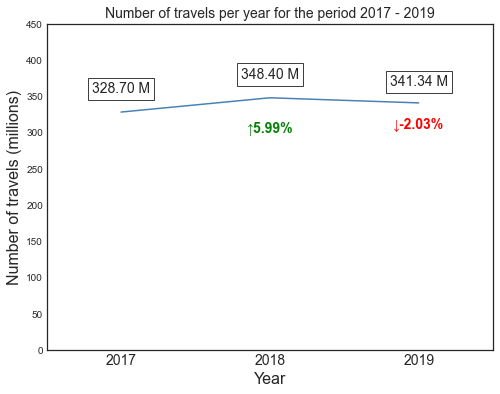

In [109]:
plt.style.use("seaborn-white")

# Create the figure and the axis
fig, ax = plt.subplots(figsize = (8, 6))

# Gráfico
plt.plot(total_year["year"], total_year["total"], linestyle = "-", color = "steelblue", markersize = 14, markerfacecolor = "black", )

# Title, labels and limits of the axis "x" and "y"
plt.title("Number of travels per year for the period 2017 - 2019", fontsize = 14)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Number of travels (millions)", fontsize = 16)
plt.ylim(0, 450)

# Ticks
x = ["", "2017", "2018", "2019", ""]
plt.xticks(ticks = [2016.5,2017,2018,2019,2019.5], labels = x, fontsize = 14)

# Text that appears on the chart
plt.text(2017, 355, "328.70 M", ha = "center", fontsize = 14, bbox = dict(facecolor = 'white', alpha = .75))
plt.text(2018, 375, "348.40 M", ha = "center", fontsize = 14, bbox = dict(facecolor = 'white', alpha = .75))
plt.text(2019, 365, "341.34 M", ha = "center", fontsize = 14, bbox = dict(facecolor = 'white', alpha = .75))
plt.text(2018, 300,"↑" + str(gain_2018) + "%", ha = "center", fontsize = 14, color = "green", fontweight = "bold")
plt.text(2019, 305,"↓" + str(gain_2019) + "%", ha = "center", fontsize = 14, color = "red", fontweight = "bold")

plt.show()

- This graph shows the total number of trips per year in the selected time frame.

- An increase from 2017 to 2018 in total passengers of `5.99%` was observed with a drop of `-2.03%` for 2019.

<a id='Number_of_travels_per_month_between_the_years_2017-2019'></a>

#### A.1.3 Number of travels per month between the years 2017-2019

In [102]:
# A grouping is generated based on the month, calculating the number of total trips made per month.

total_month = df_subway.groupby([df_subway["month"]])[["total"]].sum().reset_index()

In [103]:
# Lists are generated to rename the months, passing from the month number to the name of the month.

numbers_month = [1,2,3,4,5,6,7,8,9,10,11,12]
names_month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "Octuber", "November", "December"]

In [104]:
# Replace

total_month['month'] = total_month['month'].replace(numbers_month, names_month)

In [105]:
# Rename columns

total_month = total_month.rename(columns = {"month": "Month", "total": "Travels"})

In [106]:
# Note that using `,` to separate the thousands results in a transformation of the data type to `object`.
# That is why the table is not saved with `,`, only a display of it is generated.

month = total_month[["Month"]]
travels = total_month["Travels"].apply(lambda x : "{:,}".format(x))

In [107]:
pd.concat([month, travels], axis = 1).style.set_properties(**{'text-align': 'center'})                   

,Month,Travels
0,January,"64,766,341.0"
1,February,"64,022,663.0"
2,March,"86,256,303.0"
3,April,"83,523,261.0"
4,May,"90,701,387.0"
5,June,"86,805,838.0"
6,July,"89,881,555.0"
7,August,"95,447,531.0"
8,September,"90,415,641.0"
9,Octuber,"96,376,025.0"


Graph of number of trips per month during the period 2017-2019

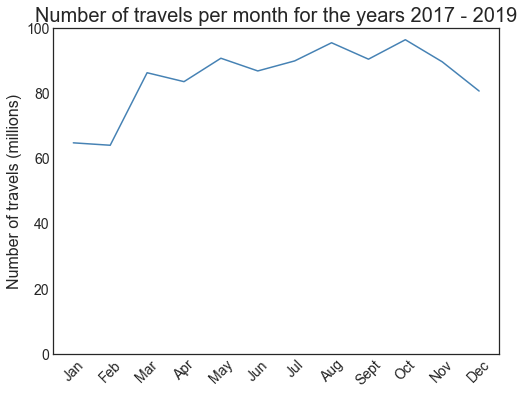

In [110]:
fig, ax = plt.subplots(figsize = (8, 6))

plt.plot(total_month["Month"], total_month["Travels"] / 1000000, linestyle = "-", color = "steelblue", markersize = 14, markerfacecolor = "black", )

names_month
names_month_abrev = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]

plt.title("Number of travels per month for the years 2017 - 2019", fontsize = 20)
plt.ylabel("Number of travels (millions)", fontsize = 16)
plt.xticks(names_month, names_month_abrev, rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(0, 100)

plt.show()

In this sense, a drop in trips is observed between the end of the year and the beginning of the year, coinciding with the summer holidays, with an oscillation between March and November between 80 and 95 million trips per month.

<a id='Number_of_travels_per_month_for_each_year'></a>

#### A.1.4 Number of travels per month for each year

In [111]:
total_month_year = df_subway.groupby(["year", "month"])[["total"]].sum().reset_index()
total_month_year.head()

,year,month,total
0,2017,1,18552911.0
1,2017,2,17883468.0
2,2017,3,28632609.0
3,2017,4,25661548.0
4,2017,5,29630326.0


In [112]:
# Filters are created by year

mask_2017 = total_month_year["year"] == 2017
mask_2018 = total_month_year["year"] == 2018
mask_2019 = total_month_year["year"] == 2019

total_2017 = total_month_year[mask_2017]
total_2018 = total_month_year[mask_2018]
total_2019 = total_month_year[mask_2019]

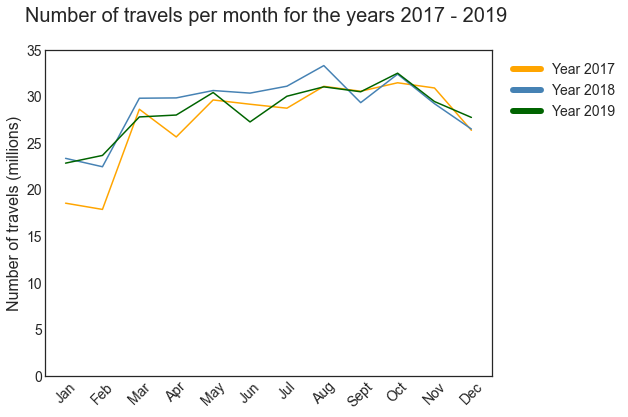

In [113]:
# Create the figure and the axis
fig, ax = plt.subplots(figsize = (8, 6))

# Graphics
plt.plot(total_2017["month"], total_2017["total"] / 1000000, linestyle = "-", color = "orange", markersize = 6, markerfacecolor = "orange", label = "Year 2017")
plt.plot(total_2018["month"], total_2018["total"] / 1000000, linestyle = "-",  color = "steelblue", markersize = 6, markerfacecolor = "steelblue", label = "Year 2018")
plt.plot(total_2019["month"], total_2019["total"] / 1000000, linestyle = "-",  color = "darkgreen", markersize = 6, markerfacecolor = "darkgreen", label = "Year 2019")

# Title, labels and limits of the axis "x" and "y"
plt.title("Number of travels per month for the years 2017 - 2019 \n", fontsize = 20)
plt.ylabel("Number of travels (millions)", fontsize = 16)
plt.ylim(0, 35)

# Ticks
names_month
names_month_abrev = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
plt.xticks(numbers_month, names_month_abrev, rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)

# Legend
leg = plt.legend(fontsize = 14, bbox_to_anchor = (1.02, 1), loc = "upper left")
for i in range(3):
  leg.get_lines()[i].set_linewidth(6)

plt.show()

- Disaggregating the data by years, this seasonal variation persists with a drop at the end of the year and the beginning of the year.

- The drop in June 2019 coincides with the opening of 3 new subway entrances on the E line and two connections, which generated more length of transport on the line for the same number of trains and services, reducing the offer due to a decrease in its frequency.

<a id='Number_of_travels_weekday_and_weekend'></a>

### A.2 Number of travels: weekday and weekend

The variation of the trips was evaluated according to whether it was a business day or not, since this variation could have an impact on subsequent correlations.

In [114]:
travels_total = df_subway["total"].sum()
travels_yes = df_subway.groupby(["weekday"])["total"].sum()[1].astype("int")
travels_no = df_subway.groupby(["weekday"])["total"].sum()[0].astype("int")
percentage_yes = travels_yes/travels_total 
percentage_no = travels_no/travels_total

print(f"Number of travels made on business days: {travels_yes:,d}")
print(f"Number of travels made on non-working days: {travels_no:,d}")
print("---")
print(f"Percentage of travels on weekdays: {percentage_yes:0.2%}")
print(f"Percentage of travels on weekends: {percentage_no:.2%}")

Number of travels made on business days: 891,278,192
Number of travels made on non-working days: 127,164,148
---
Percentage of travels on weekdays: 87.51%
Percentage of travels on weekends: 12.49%


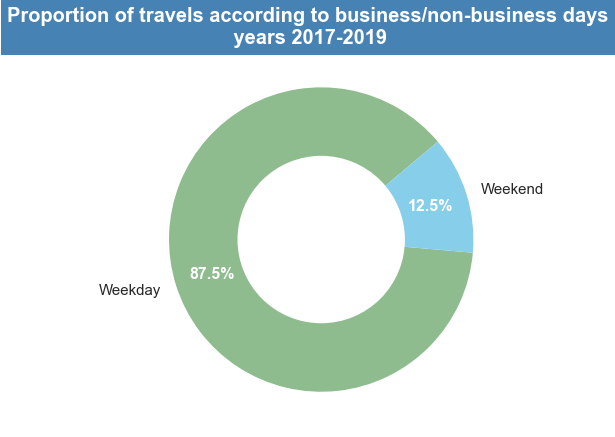

In [115]:
# Creating plot
fig, ax = plt.subplots(figsize = (10, 7))
 
 
# Creating dataset
data = [(percentage_yes * 100).round(2), (percentage_no * 100).round(2)]
labels = ["Weekday", "Weekend"]
explode = (0.1, 0) 

textprops = {"fontsize": 15}
_, _, autopcts = ax.pie(data, labels = labels, autopct = '%1.1f%%', pctdistance = 0.75, textprops = textprops,
                       shadow = False, startangle = 40, colors = ("darkseagreen", "skyblue"))

centre_circle = plt.Circle((0, 0), 0.55, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize': 16})
plt.title("Proportion of travels according to business/non-business days\n years 2017-2019", position = (.465, 1), backgroundcolor = "steelblue", color = "white", fontsize = 20, weight = "bold")

plt.show()

In this graph we see that 85% of the trips are made during business days.

Although they will not be graphed, the ratio of weekday/weekend days for each year is shown.

In [116]:
travels_total = df_subway[df_subway['year'] == 2017]["total"].sum()
travels_yes = df_subway[df_subway['year'] == 2017].groupby(["weekday"])["total"].sum()[1].astype("int")
travels_no = df_subway[df_subway['year'] == 2017].groupby(["weekday"])["total"].sum()[0].astype("int")
percentage_yes = travels_yes/travels_total 
percentage_no = travels_no/travels_total

print(f"Number of travels made on business days during the year 2017: {travels_yes:,d}")
print(f"Number of travels made on non-working days in 2017: {travels_no:,d}")
print("---")
print(f"Percentage of travels on weekdays in 2017: {percentage_yes:0.2%}")
print(f"Percentage of travels on weekends in 2017: {percentage_no:.2%}")

Number of travels made on business days during the year 2017: 287,298,058
Number of travels made on non-working days in 2017: 41,403,667
---
Percentage of travels on weekdays in 2017: 87.40%
Percentage of travels on weekends in 2017: 12.60%


In [117]:
travels_total = df_subway[df_subway['year'] == 2018]["total"].sum()
travels_yes = df_subway[df_subway['year'] == 2018].groupby(["weekday"])["total"].sum()[1].astype("int")
travels_no = df_subway[df_subway['year'] == 2018].groupby(["weekday"])["total"].sum()[0].astype("int")
percentage_yes = travels_yes/travels_total 
percentage_no = travels_no/travels_total

print(f"Number of travels made on business days during the year 2018: {travels_yes:,d}")
print(f"Number of travels made on non-working days in 2018: {travels_no:,d}")
print("---")
print(f"Percentage of travels on weekdays in 2018: {percentage_yes:0.2%}")
print(f"Percentage of travels on weekends in 2018: {percentage_no:.2%}")

Number of travels made on business days during the year 2018: 303,885,958
Number of travels made on non-working days in 2018: 44,514,156
---
Percentage of travels on weekdays in 2018: 87.22%
Percentage of travels on weekends in 2018: 12.78%


In [118]:
travels_total = df_subway[df_subway['year'] == 2019]["total"].sum()
travels_yes = df_subway[df_subway['year'] == 2019].groupby(["weekday"])["total"].sum()[1].astype("int")
travels_no = df_subway[df_subway['year'] == 2019].groupby(["weekday"])["total"].sum()[0].astype("int")
percentage_yes = travels_yes/travels_total 
percentage_no = travels_no/travels_total

print(f"Number of travels made on business days during the year 2019: {travels_yes:,d}")
print(f"Number of travels made on non-working days in 2019: {travels_no:,d}")
print("---")
print(f"Percentage of travels on weekdays in 2019: {percentage_yes:0.2%}")
print(f"Percentage of travels on weekends in 2019: {percentage_no:.2%}")

Number of travels made on business days during the year 2019: 300,094,176
Number of travels made on non-working days in 2019: 41,246,325
---
Percentage of travels on weekdays in 2019: 87.92%
Percentage of travels on weekends in 2019: 12.08%


In [119]:
# Weekday
mask_weekday = df_subway["weekday"] == "yes"
df_subway_weekday = df_subway[mask_weekday]

# Weekend
mask_weekend = df_subway["weekday"] == "no"
df_subway_weekend = df_subway[mask_weekend]

In [120]:
df_subway_weekday.head()

,fecha,year,month,desde,linea,estacion,total,weekday,linea_estacion,id_estacion,lat,long
1287,2017-01-02,2017,1,5.0,B,ANGEL GALLARDO,35.0,yes,B-ANGEL GALLARDO,135.0,-34.602047,-58.431351
1288,2017-01-02,2017,1,5.0,B,CALLAO,13.0,yes,B-CALLAO,112.0,-34.604352,-58.392879
1289,2017-01-02,2017,1,5.0,B,CARLOS GARDEL,17.0,yes,B-CARLOS GARDEL,127.0,-34.603999,-58.412041
1290,2017-01-02,2017,1,5.0,B,CARLOS PELLEGRINI,97.0,yes,B-CARLOS PELLEGRINI,103.0,-34.603939,-58.380852
1291,2017-01-02,2017,1,5.0,B,DORREGO,67.0,yes,B-DORREGO,143.0,-34.591439,-58.447711


In [121]:
df_subway_weekend.head()

,fecha,year,month,desde,linea,estacion,total,weekday,linea_estacion,id_estacion,lat,long
0,2017-01-01,2017,1,8.0,B,ANGEL GALLARDO,41.0,no,B-ANGEL GALLARDO,135.0,-34.602047,-58.431351
1,2017-01-01,2017,1,8.0,B,CALLAO,25.0,no,B-CALLAO,112.0,-34.604352,-58.392879
2,2017-01-01,2017,1,8.0,B,CARLOS GARDEL,29.0,no,B-CARLOS GARDEL,127.0,-34.603999,-58.412041
3,2017-01-01,2017,1,8.0,B,CARLOS PELLEGRINI,66.0,no,B-CARLOS PELLEGRINI,103.0,-34.603939,-58.380852
4,2017-01-01,2017,1,8.0,B,DORREGO,36.0,no,B-DORREGO,143.0,-34.591439,-58.447711


In [122]:
total_month_weekday = df_subway_weekday.groupby([df_subway_weekday["month"]])[["total"]].sum().reset_index()
total_month_weekend = df_subway_weekend.groupby([df_subway_weekend["month"]])[["total"]].sum().reset_index()

In [123]:
total_month_weekday.head()

,month,total
0,1,58133769.0
1,2,56614630.0
2,3,74177402.0
3,4,71608332.0
4,5,80526151.0


In [124]:
total_month_weekend.head()

,month,total
0,1,6632572.0
1,2,7408033.0
2,3,12078901.0
3,4,11914929.0
4,5,10175236.0


In [125]:
numbers_month = [1,2,3,4,5,6,7,8,9,10,11,12]
names_month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "Octuber", "November", "December"]

In [126]:
# Replace

total_month_weekday["month"] = total_month_weekday["month"].replace(numbers_month, names_month)
total_month_weekend["month"] = total_month_weekend["month"].replace(numbers_month, names_month)

In [127]:
# Rename columns

total_month_weekday = total_month_weekday.rename(columns = {"month": "Month", "total": "Travels"})
total_month_weekend = total_month_weekend.rename(columns = {"month": "Month", "total": "Travels"})

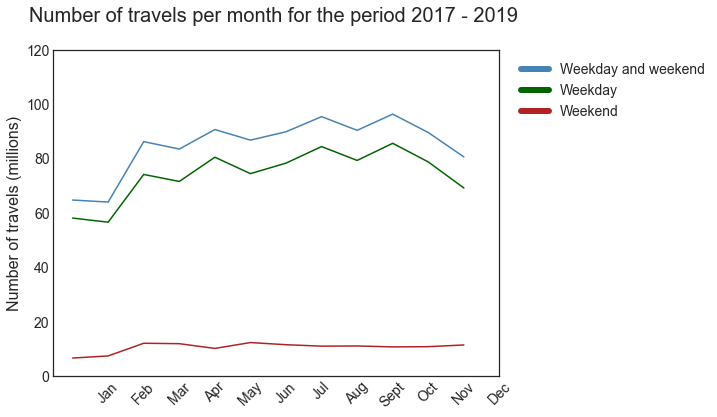

In [128]:
# Create the figure and the axis
fig, ax = plt.subplots(figsize = (8, 6))

# Graphics
plt.plot(total_month["Month"], total_month["Travels"] / 1000000, linestyle = "-", color = "steelblue", markersize = 6, markerfacecolor = "steelblue", label = "Weekday and weekend")
plt.plot(total_month_weekday["Month"], total_month_weekday["Travels"] / 1000000, linestyle = "-", color = "darkgreen", markersize = 6, markerfacecolor = "darkgreen", label = "Weekday")
plt.plot(total_month_weekend["Month"], total_month_weekend["Travels"] / 1000000, linestyle = "-", color = "firebrick", markersize = 6, markerfacecolor = "firebrick", label = "Weekend")

# Title, labels and limits of the axis "x" and "y"
plt.title("Number of travels per month for the period 2017 - 2019 \n", fontsize = 20)
plt.ylabel("Number of travels (millions)", fontsize = 16)

# Ticks 
numbers_month = [1,2,3,4,5,6,7,8,9,10,11,12]
names_month_abrev = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
plt.xticks(numbers_month, names_month_abrev, rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(0, 120)

plt.legend(fontsize = 12, frameon = False)

# Legend
leg = plt.legend(fontsize = 14, bbox_to_anchor = (1.02, 1), loc = "upper left")
for i in range(3):
    leg.get_lines()[i].set_linewidth(6)

plt.show()

plt.show()

- We observe that the curve of business days replicates in a practically symmetrical way what was observed in the total, marking the impact of business days on the flow of trips on the subway.

- The travel curve on weekends remains without marked changes

<a id='Number_of_travels_subway_line'></a>

### A.3 Number of travels: subway line

<a id='Number_of_travels_per_subway_line_between_the_years_2017-2019'></a>

#### A.3.1 Number of travels per subway line between the years 2017-2019

In [129]:
total_line = df_subway.groupby("linea")[["total"]].sum().reset_index()
total_line = total_line.rename(columns = {"linea": "Line", "total": "Travels"})

In [130]:
total_line

,Line,Travels
0,A,189003761.0
1,B,268185300.0
2,C,153789689.0
3,D,244583775.0
4,E,69073830.0
5,H,93805985.0


In [131]:
# Table that shows the number of trips made by each subway line.

line = total_line[["Line"]]
travels = total_line["Travels"].apply(lambda x : "{:,}".format(x))
pd.concat([line, travels], axis = 1).style.set_properties(**{"text-align": "center"})  

,Line,Travels
0,A,"189,003,761.0"
1,B,"268,185,300.0"
2,C,"153,789,689.0"
3,D,"244,583,775.0"
4,E,"69,073,830.0"
5,H,"93,805,985.0"


In [132]:
# Before graphing the bars, a table with trips per million is created.

total_line["Travels"] = (total_line["Travels"] / 1000000).round(2) 
total_line = total_line.sort_values("Travels")
total_line = total_line.reset_index().drop("index", axis = 1)

In [133]:
total_line

,Line,Travels
0,E,69.07
1,H,93.81
2,C,153.79
3,A,189.00
4,D,244.58
5,B,268.19


In [134]:
# Before graphing, a table with percentages is added.

total_line_pct = total_line.copy()
total_line_pct["Travels"] = ((total_line_pct["Travels"] / total_line_pct["Travels"].sum()) * 100).round(2)

In [135]:
total_line_pct

,Line,Travels
0,E,6.78
1,H,9.21
2,C,15.10
3,A,18.56
4,D,24.02
5,B,26.33


In [136]:
# Function to add labels 

def addlabels_abs(x,y):
    for i in range(len(total_line["Line"])):
        plt.text(i, y[i] + 0.5, y[i].astype("str") + "M", ha = "center", fontsize = 14, bbox = dict(facecolor = "white", alpha = .75))

In [137]:
# Function to add labels 

def addlabels_pct(x,y):
    for i in range(len(total_line["Line"])):
        plt.text(i, y[i]*4, y[i].astype("str") + "%", ha = "center", fontsize = 14, bbox = dict(facecolor = "white", alpha = .75))

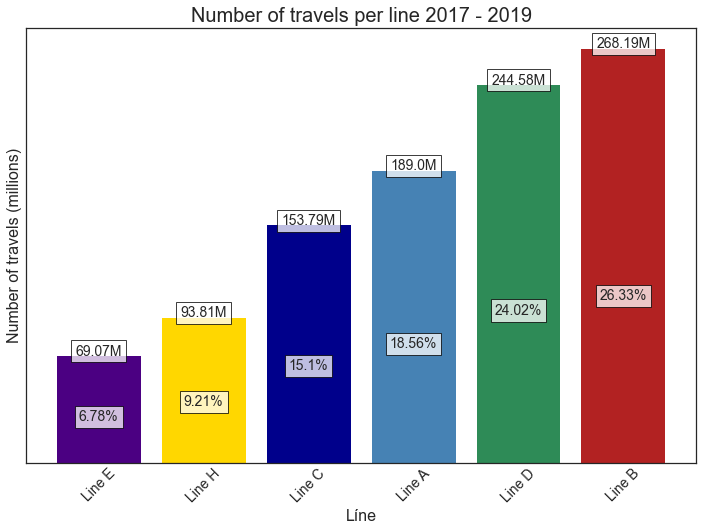

In [139]:
# Create the figure and the axis
fig, ax = plt.subplots(figsize = (12, 8))

# Graphics
colors = ["indigo", "gold", "darkblue", "steelblue", "seagreen", "firebrick"]
plt.bar(total_line["Line"], total_line["Travels"], width = 0.8, align = "center", color = colors)

# Title, labels and limits of the axis "x" and "y"
plt.title("Number of travels per line 2017 - 2019", fontsize = 20)
plt.ylabel("Number of travels (millions)", fontsize = 16)
plt.xlabel("Líne", fontsize = 16)
lines = ["Line E", "Line H", "Line C", "Line A", "Line D", "Line B"]

# Ticks
plt.xticks(ticks = total_line["Line"], labels = lines, rotation = 45, fontsize = 14)
plt.yticks([])

# Legends
addlabels_abs(total_line["Line"], total_line["Travels"])
addlabels_pct(total_line["Line"], total_line_pct["Travels"])

plt.show()

Once the number of trips per line has been evaluated, it is observed that lines B and D have 50% of the trips.

<a id='Number_of_travels_per_subway_line_for_each_year'></a>

#### A.3.2 Number of travels per subway line for each year

In [140]:
df_subway[df_subway["year"] == 2019].head()

,fecha,year,month,desde,linea,estacion,total,weekday,linea_estacion,id_estacion,lat,long
1109445,2019-01-01,2019,1,8.0,A,ACOYTE,37.0,no,A-ACOYTE,66.0,-34.617927,-58.435886
1109446,2019-01-01,2019,1,8.0,A,ALBERTI,13.0,no,A-ALBERTI,44.0,-34.609941,-58.401039
1109447,2019-01-01,2019,1,8.0,A,CARABOBO,44.0,no,A-CARABOBO,79.0,-34.626419,-58.456334
1109448,2019-01-01,2019,1,8.0,A,CASTRO BARROS,24.0,no,A-CASTRO BARROS,59.0,-34.611792,-58.421497
1109449,2019-01-01,2019,1,8.0,A,CONGRESO,26.0,no,A-CONGRESO,20.0,-34.609138,-58.392680


In [141]:
# Grouping by line year 2017

total_line_2017 = df_subway[df_subway["year"] == 2017].groupby("linea")[["total"]].sum().reset_index()
total_line_2017 = total_line_2017.rename(columns = {"linea": "Line", "total": "Travels"})
total_line_2017["Travels"] = (total_line_2017["Travels"] / 1000000).round(2) 
total_line_2017 = total_line_2017.sort_values("Travels")
total_line_2017 = total_line_2017.reset_index().drop("index", axis = 1)

In [142]:
# Grouping by line year 2018

total_line_2018 = df_subway[df_subway["year"] == 2018].groupby("linea")[["total"]].sum().reset_index()
total_line_2018 = total_line_2018.rename(columns = {"linea": "Line", "total": "Travels"})
total_line_2018["Travels"] = (total_line_2018["Travels"] / 1000000).round(2) 
total_line_2018 = total_line_2018.sort_values("Travels")
total_line_2018 = total_line_2018.reset_index().drop("index", axis = 1)

In [143]:
# Grouping by line year 2019

total_line_2019 = df_subway[df_subway["year"] == 2019].groupby("linea")[["total"]].sum().reset_index()
total_line_2019 = total_line_2019.rename(columns = {"linea": "Line", "total": "Travels"})
total_line_2019["Travels"] = (total_line_2019["Travels"] / 1000000).round(2) 
total_line_2019 = total_line_2019.sort_values("Travels")
total_line_2019 = total_line_2019.reset_index().drop("index", axis = 1)

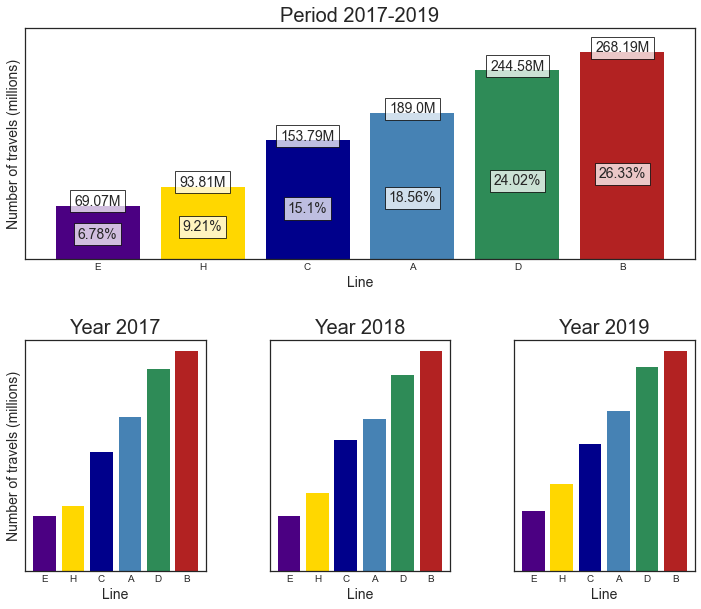

In [144]:
# Create the figure and the axis
fig = plt.figure(figsize =(12, 10))
plt.subplots_adjust(wspace = 0.35, hspace = 0.35)

# For all years
sub1 = fig.add_subplot(2,1,1)
plt.grid(axis = 'y', linestyle = "--", alpha = 0.7)
plt.bar(total_line["Line"], total_line["Travels"], width = 0.8, align = "center", color = colors)
plt.title("Period 2017-2019", fontsize = 20)
plt.ylabel("Number of travels (millions)", fontsize = 14)
plt.xlabel("Line", fontsize = 14)
plt.ylim(0,300)
plt.yticks([])
addlabels_abs(total_line["Line"], total_line["Travels"])
addlabels_pct(total_line["Line"], total_line_pct["Travels"])


# Year 2017
sub2 = fig.add_subplot(2,3,4)
plt.bar(total_line_2017["Line"], total_line_2017["Travels"], width = 0.8, align = "center", color = colors)
plt.title("Year 2017", fontsize = 20)
plt.ylabel("Number of travels (millions)", fontsize = 14)
plt.yticks([])
plt.xlabel("Line", fontsize = 14)

# Year 2018
sub3 = fig.add_subplot(2,3,5)
plt.bar(total_line_2018["Line"], total_line_2018["Travels"], width = 0.8, align = "center", color = colors)
plt.title("Year 2018", fontsize = 20)
plt.yticks([])
plt.xlabel("Line", fontsize = 14)

# Year 2019
sub4 = fig.add_subplot(2,3,6)
plt.bar(total_line_2019["Line"], total_line_2019["Travels"], width = 0.8, align = "center", color = colors)
plt.title("Year 2019", fontsize = 20)
plt.yticks([])
plt.xlabel("Line", fontsize = 14)

plt.show()

It is observed that for each year the trend is maintained

<a id='Number_of_travels_weekdays'></a>

### A.4 Number of travels: weekdays

<a id='Number_of_travels_for_each_weekday_of_the_period_2017-2019'></a>

#### A.4.1 Number of travels for each weekday of the period 2017-2019

In [145]:
df_subway_weekday.head()

,fecha,year,month,desde,linea,estacion,total,weekday,linea_estacion,id_estacion,lat,long
1287,2017-01-02,2017,1,5.0,B,ANGEL GALLARDO,35.0,yes,B-ANGEL GALLARDO,135.0,-34.602047,-58.431351
1288,2017-01-02,2017,1,5.0,B,CALLAO,13.0,yes,B-CALLAO,112.0,-34.604352,-58.392879
1289,2017-01-02,2017,1,5.0,B,CARLOS GARDEL,17.0,yes,B-CARLOS GARDEL,127.0,-34.603999,-58.412041
1290,2017-01-02,2017,1,5.0,B,CARLOS PELLEGRINI,97.0,yes,B-CARLOS PELLEGRINI,103.0,-34.603939,-58.380852
1291,2017-01-02,2017,1,5.0,B,DORREGO,67.0,yes,B-DORREGO,143.0,-34.591439,-58.447711


In [146]:
total_weekday = df_subway_weekday.groupby([df_subway_weekday["fecha"].dt.weekday])[["total"]].sum().reset_index()

In [147]:
total_weekday

,fecha,total
0,0,158667578.0
1,1,176729936.0
2,2,187679968.0
3,3,185814227.0
4,4,182386483.0


In [148]:
number_day = [0,1,2,3,4]
names_day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

In [149]:
total_weekday["fecha"] = total_weekday["fecha"].replace(number_day, names_day)

In [150]:
total_weekday

,fecha,total
0,Monday,158667578.0
1,Tuesday,176729936.0
2,Wednesday,187679968.0
3,Thursday,185814227.0
4,Friday,182386483.0


In [151]:
total_weekday = total_weekday.rename(columns = {"fecha": "Day", "total": "Travels"})

In [152]:
total_weekday

,Day,Travels
0,Monday,158667578.0
1,Tuesday,176729936.0
2,Wednesday,187679968.0
3,Thursday,185814227.0
4,Friday,182386483.0


In [153]:
weekday = total_weekday[["Day"]]
travels_weekday = total_weekday["Travels"].apply(lambda x : "{:,}".format(x))

In [154]:
pd.concat([weekday, travels_weekday], axis = 1).style.set_properties(**{"text-align": "center"})  

,Day,Travels
0,Monday,"158,667,578.0"
1,Tuesday,"176,729,936.0"
2,Wednesday,"187,679,968.0"
3,Thursday,"185,814,227.0"
4,Friday,"182,386,483.0"


In [155]:
total_weekday["Travels"] = (total_weekday["Travels"] / 1000000).round(2)

In [156]:
total_weekday

,Day,Travels
0,Monday,158.67
1,Tuesday,176.73
2,Wednesday,187.68
3,Thursday,185.81
4,Friday,182.39


In [157]:
# Create a table with groupings per line

total_weekday_line = df_subway_weekday.groupby([df_subway_weekday["fecha"].dt.weekday, "linea"])[["total"]].sum().reset_index()

In [158]:
total_weekday_line["fecha"] = total_weekday_line["fecha"].replace(number_day, names_day)

In [159]:
total_weekday_line = total_weekday_line.rename(columns = {"fecha": "Day", "linea": "Line", "total": "Travels"})

In [160]:
total_weekday_line["Travels"] = (total_weekday_line["Travels"] / 1000000).round(2)

In [161]:
lines_letters = ["A", "B", "C", "D", "E", "H"]
lines_complete = ["Linea A", "Linea B", "Linea C", "Linea D", "Linea E", "Linea H"]

In [162]:
total_weekday_line["Line"] = total_weekday_line["Line"].replace(lines_letters, lines_complete)

In [163]:
def addlabels_abs(x,y):
    for i in range(len(total_weekday["Day"])):
        plt.text(i, y[i] + 2, y[i].astype("str") + "M", ha = "center", fontsize = 14, bbox = dict(facecolor = "white", alpha = .75))

In [164]:
def addlabels_abs(x,y):
    for i in range(len(total_weekday["Day"])):
        ax[0].text(i, y[i] + 8, y[i].astype("str") + " M", ha = "center", fontsize = 14, bbox = dict(facecolor = "white", alpha = .75))

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5800\1334306486.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(labels = [0,5,10,15,20,25,30,35,40,45,50,55,60], fontsize = 14)


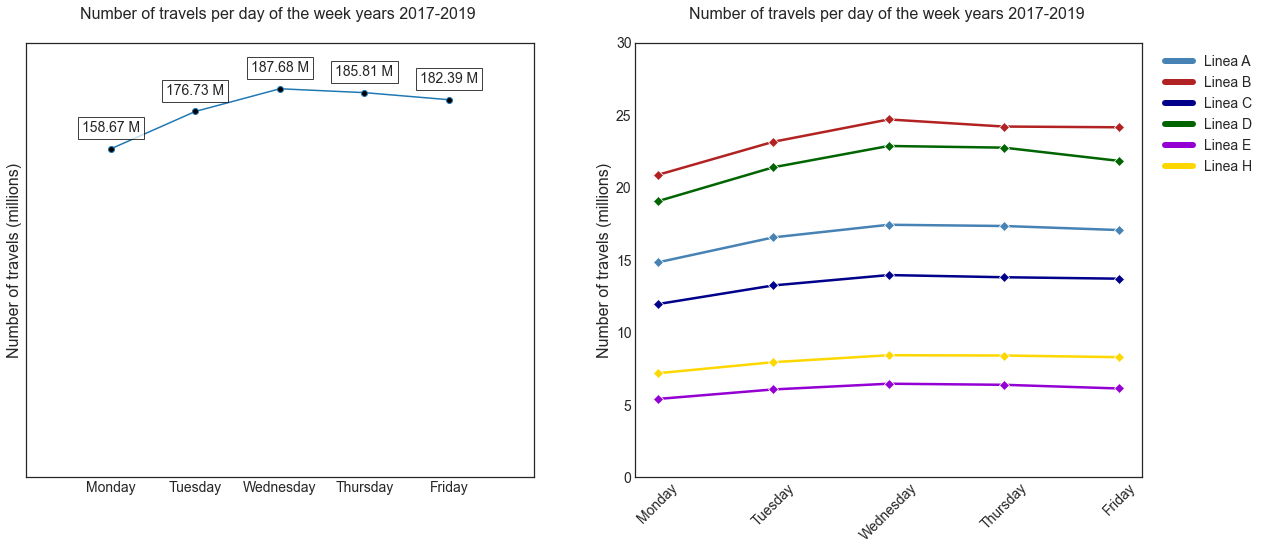

In [165]:
# Create the figure and the axis
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

# Graphics
ax[0].plot(total_weekday["Day"], total_weekday["Travels"], linestyle = "-", marker = "o", markersize = 6, markerfacecolor = "black")
palette = ["steelblue", "firebrick", "darkblue", "darkgreen", "darkviolet", "gold"]
sns.lineplot(x = "Day", y = "Travels", data = total_weekday_line, hue = "Line", marker = "D", markersize = 7, palette = palette, linestyle = "-", linewidth = 2.5, ax = ax[1])

# Title, labels, ticks for ax[0]
ax[0].set_title("Number of travels per day of the week years 2017-2019 \n", fontsize = 16)
ax[0].set_ylabel("Number of travels (millions)", fontsize = 16)

ax[0].set_xticks(ticks = [-1, 0, 1, 2, 3, 4, 5])
ax[0].set_xticklabels(labels = ["", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", ""], fontsize = 14)
ax[0].set_yticks([]),
ax[0].set_ylim((0, 210))
addlabels_abs(total_weekday["Day"], total_weekday["Travels"])

# Title, labels, ticks for ax[1]
ax[1].set_title("Number of travels per day of the week years 2017-2019 \n", fontsize = 16)
ax[1].set_ylabel("Number of travels (millions)", fontsize = 16)
ax[1].set_xlabel("")
ax[1].set_xticks(ticks = [0,1,2,3,4])
ax[1].set_xticklabels(labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"], rotation = 45, fontsize = 14)
ax[1].set_yticklabels(labels = [0,5,10,15,20,25,30,35,40,45,50,55,60], fontsize = 14)
ax[1].set_ylim((0, 60))

leg = ax[1].legend(fontsize = 14, bbox_to_anchor = (1.02, 1), loc = "upper left")
for i in range(6):
    leg.get_lines()[i].set_linewidth(6)

plt.show()

- Since the greatest demand occurs during business days, the distribution of tickets is evaluated, disaggregated by day of the week and subway line.

- It is observed that there is an average predominance on Wednesday and that this distribution is respected by disaggregating by subway line.

<a id='Number_of_travels_for_each_weekday_for_each_year'></a>

#### A.4.2 Number of travels for each weekday for each year

**Year 2019**

In [166]:
mask_weekday_2019 = df_subway[df_subway["year"] == 2019]["weekday"] == "yes"
weekday_2019 = df_subway[df_subway["year"] == 2019][mask_weekday_2019]

In [167]:
weekday_2019.head(1)

,fecha,year,month,desde,linea,estacion,total,weekday,linea_estacion,id_estacion,lat,long
1110755,2019-01-02,2019,1,0.0,C,SAN JUAN,0.0,yes,C-SAN JUAN,192.0,-34.621815,-58.379926


In [168]:
total_weekday_2019 = weekday_2019.groupby([weekday_2019["fecha"].dt.weekday])[["total"]].sum().reset_index()

In [169]:
number_day = [0,1,2,3,4]
names_day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

In [170]:
total_weekday_2019['fecha'] = total_weekday_2019['fecha'].replace(number_day, names_day)

In [171]:
total_weekday_2019 = total_weekday_2019.rename(columns = {"fecha": "Day", "total": "Travels"})

In [172]:
day_weekday_19 = total_weekday_2019[["Day"]]
travels_weekday_19 = total_weekday_2019["Travels"].apply(lambda x : "{:,}".format(x))

Table showing the number of trips made per business day of the week during 2019

In [173]:
pd.concat([day_weekday_19, travels_weekday_19], axis = 1).style.set_properties(**{'text-align': 'center'})  

,Day,Travels
0,Monday,"56,507,268.0"
1,Tuesday,"57,570,168.0"
2,Wednesday,"60,411,218.0"
3,Thursday,"62,812,653.0"
4,Friday,"62,792,869.0"


In [174]:
total_weekday_2019["Travels"] = (total_weekday_2019["Travels"] / 1000000).round(2)

In [175]:
# Table for graphic

total_weekday_2019

,Day,Travels
0,Monday,56.51
1,Tuesday,57.57
2,Wednesday,60.41
3,Thursday,62.81
4,Friday,62.79


**Year 2018**

In [176]:
mask_weekday_2018 = df_subway[df_subway["year"] == 2018]["weekday"] == "yes"
weekday_2018 = df_subway[df_subway["year"] == 2018][mask_weekday_2018]

In [177]:
weekday_2018.head(1)

,fecha,year,month,desde,linea,estacion,total,weekday,linea_estacion,id_estacion,lat,long
549001,2018-01-02,2018,1,5.0,A,ACOYTE,30.0,yes,A-ACOYTE,66.0,-34.617927,-58.435886


In [178]:
total_weekday_2018 = weekday_2018.groupby([weekday_2018["fecha"].dt.weekday])[["total"]].sum().reset_index()

In [179]:
number_day = [0,1,2,3,4]
names_day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

In [180]:
total_weekday_2018['fecha'] = total_weekday_2018['fecha'].replace(number_day, names_day)

In [181]:
total_weekday_2018 = total_weekday_2018.rename(columns = {"fecha": "Day", "total": "Travels"})

In [182]:
total_weekday_2018

,Day,Travels
0,Monday,52329540.0
1,Tuesday,60355453.0
2,Wednesday,64586639.0
3,Thursday,65106740.0
4,Friday,61507586.0


In [183]:
day_weekday_18 = total_weekday_2018[["Day"]]
travels_weekday_18 = total_weekday_2018["Travels"].apply(lambda x : "{:,}".format(x))

Table showing the number of trips made per business day of the week during 2018

In [184]:
pd.concat([day_weekday_18, travels_weekday_18], axis = 1).style.set_properties(**{'text-align': 'center'})  

,Day,Travels
0,Monday,"52,329,540.0"
1,Tuesday,"60,355,453.0"
2,Wednesday,"64,586,639.0"
3,Thursday,"65,106,740.0"
4,Friday,"61,507,586.0"


In [185]:
total_weekday_2018["Travels"] = (total_weekday_2018["Travels"] / 1000000).round(2)

In [186]:
# Table for graphic

total_weekday_2018

,Day,Travels
0,Monday,52.33
1,Tuesday,60.36
2,Wednesday,64.59
3,Thursday,65.11
4,Friday,61.51


**Year 2017**

In [187]:
mask_weekday_2017 = df_subway[df_subway["year"] == 2017]["weekday"] == "yes"
weekday_2017 = df_subway[df_subway["year"] == 2017][mask_weekday_2017]

In [188]:
weekday_2017.head(1)

,fecha,year,month,desde,linea,estacion,total,weekday,linea_estacion,id_estacion,lat,long
1287,2017-01-02,2017,1,5.0,B,ANGEL GALLARDO,35.0,yes,B-ANGEL GALLARDO,135.0,-34.602047,-58.431351


In [189]:
total_weekday_2017 = weekday_2017.groupby([weekday_2017["fecha"].dt.weekday])[["total"]].sum().reset_index()

In [190]:
number_day = [0,1,2,3,4]
names_day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

In [191]:
total_weekday_2017['fecha'] = total_weekday_2017['fecha'].replace(number_day, names_day)

In [192]:
total_weekday_2017 = total_weekday_2017.rename(columns = {"fecha": "Day", "total": "Travels"})

In [193]:
total_weekday_2017

,Day,Travels
0,Monday,49830770.0
1,Tuesday,58804315.0
2,Wednesday,62682111.0
3,Thursday,57894834.0
4,Friday,58086028.0


In [194]:
day_weekday_17 = total_weekday_2017[["Day"]]
travels_weekday_17 = total_weekday_2017["Travels"].apply(lambda x : "{:,}".format(x))

Table showing the number of trips made per business day of the week during 2017

In [195]:
pd.concat([day_weekday_17, travels_weekday_17], axis = 1).style.set_properties(**{'text-align': 'center'})  

,Day,Travels
0,Monday,"49,830,770.0"
1,Tuesday,"58,804,315.0"
2,Wednesday,"62,682,111.0"
3,Thursday,"57,894,834.0"
4,Friday,"58,086,028.0"


In [196]:
total_weekday_2017["Travels"] = (total_weekday_2017["Travels"] / 1000000).round(2)

In [197]:
# Table for grphic

total_weekday_2017

,Day,Travels
0,Monday,49.83
1,Tuesday,58.80
2,Wednesday,62.68
3,Thursday,57.89
4,Friday,58.09


In [198]:
def addlabels_abs_0(x,y):
    for i in range(len(total_weekday["Day"])):
        ax[0].text(i, y[i] + 2, y[i].astype("str") + " M", ha = "center", fontsize = 14, bbox = dict(facecolor = 'white', alpha = .75))

In [199]:
def addlabels_abs_1(x,y):
    for i in range(len(total_weekday["Day"])):
        ax[1].text(i, y[i] + 2, y[i].astype("str") + " M", ha = "center", fontsize = 14, bbox = dict(facecolor = 'white', alpha = .75))

In [200]:
def addlabels_abs_2(x,y):
    for i in range(len(total_weekday["Day"])):
        ax[2].text(i, y[i] + 2, y[i].astype("str") + " M", ha = "center", fontsize = 14, bbox = dict(facecolor = 'white', alpha = .75))

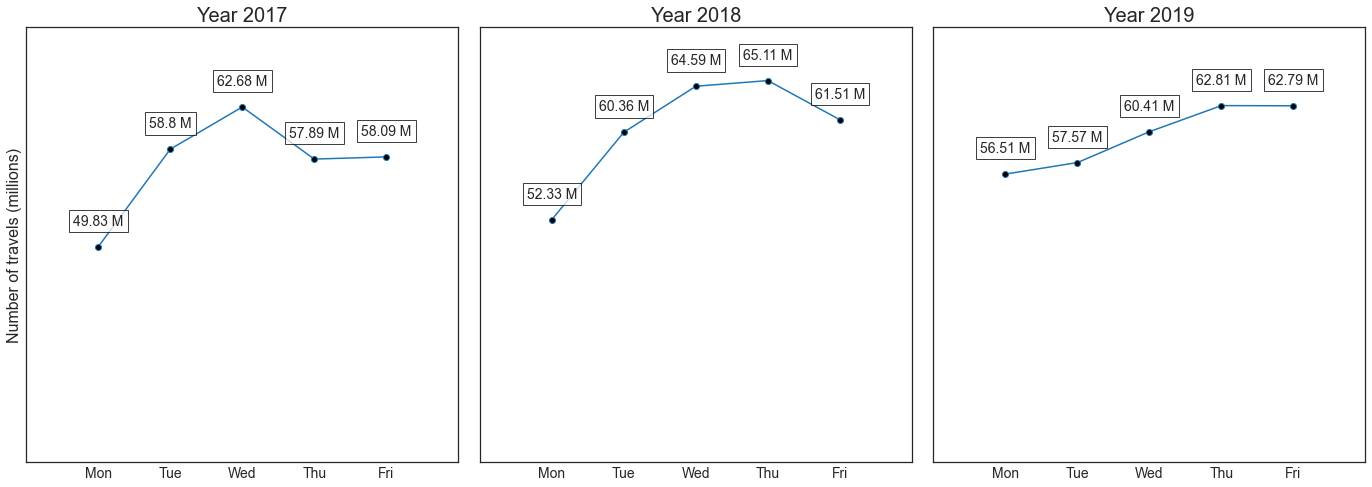

In [202]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (24, 8), sharey = True)
plt.subplots_adjust(wspace= 0.05)

# ax[0]
ax[0].plot(total_weekday_2017["Day"], total_weekday_2017["Travels"], linestyle = "-", marker = "o", markersize = 6, markerfacecolor = "black")
ax[0].set_title("Year 2017", fontsize = 20)
ax[0].set_ylabel("Number of travels (millions)", fontsize = 16)
ax[0].set_xticks(ticks = [-1, 0, 1, 2, 3, 4, 5])
ax[0].set_xticklabels(labels = ["", "Mon", "Tue", "Wed", "Thu", "Fri", ""], fontsize = 14)
ax[0].set_yticks([])
ax[0].set_ylim((30, 70))
addlabels_abs_0(total_weekday_2017["Day"], total_weekday_2017["Travels"])

# ax[1]
ax[1].plot(total_weekday_2018["Day"], total_weekday_2018["Travels"], linestyle = "-", marker = "o", markersize = 6, markerfacecolor = "black")
ax[1].set_title("Year 2018", fontsize = 20)
ax[1].set_xticks(ticks = [-1, 0, 1, 2, 3, 4, 5])
ax[1].set_xticklabels(labels = ["", "Mon", "Tue", "Wed", "Thu", "Fri", ""], fontsize = 14)
addlabels_abs_1(total_weekday_2018["Day"], total_weekday_2018["Travels"])

# ax[2]
ax[2].plot(total_weekday_2019["Day"], total_weekday_2019["Travels"], linestyle = "-", marker = "o", markersize = 6, markerfacecolor = "black")
ax[2].set_title("Year 2019", fontsize = 20)
ax[2].set_xticks(ticks = [-1, 0, 1, 2, 3, 4, 5])
ax[2].set_xticklabels(labels = ["", "Mon", "Tue", "Wed", "Thu", "Fri", ""], fontsize = 14)
addlabels_abs_2(total_weekday_2019["Day"], total_weekday_2019["Travels"])

plt.show()

- Discriminated by year, some differences are observed, but the three coincide with a progressive increase on Wednesday, with certain differences between 2107 and the following not relevant or explainable with the available data.

- When making the comparison by lines, no differences are observed disaggregating by years when comparing it with the accumulated of the three years

<a id='Number_of_travels_for_each_weekend_of_the_period_2017-2019'></a>

#### A.4.3 Number of travels for each weekend of the period 2017-2019

In [203]:
df_subway_weekend.head()

,fecha,year,month,desde,linea,estacion,total,weekday,linea_estacion,id_estacion,lat,long
0,2017-01-01,2017,1,8.0,B,ANGEL GALLARDO,41.0,no,B-ANGEL GALLARDO,135.0,-34.602047,-58.431351
1,2017-01-01,2017,1,8.0,B,CALLAO,25.0,no,B-CALLAO,112.0,-34.604352,-58.392879
2,2017-01-01,2017,1,8.0,B,CARLOS GARDEL,29.0,no,B-CARLOS GARDEL,127.0,-34.603999,-58.412041
3,2017-01-01,2017,1,8.0,B,CARLOS PELLEGRINI,66.0,no,B-CARLOS PELLEGRINI,103.0,-34.603939,-58.380852
4,2017-01-01,2017,1,8.0,B,DORREGO,36.0,no,B-DORREGO,143.0,-34.591439,-58.447711


In [204]:
total_weekend = df_subway_weekend.groupby([df_subway_weekend["fecha"].dt.weekday])[["total"]].sum().reset_index()

In [205]:
total_weekend

,fecha,total
0,0,7256859.0
1,1,1433636.0
2,2,447912.0
3,3,1612506.0
4,4,1600656.0
5,5,75880158.0
6,6,38932421.0


In [206]:
number_day_weekend = [0,1,2,3,4,5,6]
names_day_weekend = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [207]:
total_weekend["fecha"] = total_weekend["fecha"].replace(number_day_weekend, names_day_weekend)

In [208]:
total_weekend

,fecha,total
0,Monday,7256859.0
1,Tuesday,1433636.0
2,Wednesday,447912.0
3,Thursday,1612506.0
4,Friday,1600656.0
5,Saturday,75880158.0
6,Sunday,38932421.0


In [209]:
total_weekend = total_weekend.rename(columns = {"fecha": "Day", "total": "Travels"})

In [210]:
total_weekend

,Day,Travels
0,Monday,7256859.0
1,Tuesday,1433636.0
2,Wednesday,447912.0
3,Thursday,1612506.0
4,Friday,1600656.0
5,Saturday,75880158.0
6,Sunday,38932421.0


In [211]:
weekend = total_weekend[["Day"]]
travels_weekend = total_weekend["Travels"].apply(lambda x : "{:,}".format(x))

In [212]:
pd.concat([weekend, travels_weekend], axis = 1).style.set_properties(**{"text-align": "center"})  

,Day,Travels
0,Monday,"7,256,859.0"
1,Tuesday,"1,433,636.0"
2,Wednesday,"447,912.0"
3,Thursday,"1,612,506.0"
4,Friday,"1,600,656.0"
5,Saturday,"75,880,158.0"
6,Sunday,"38,932,421.0"


In [213]:
total_weekend["Travels"] = (total_weekend["Travels"] / 1000000).round(2)

In [214]:
total_weekend = total_weekend.sort_values(by = "Travels", ascending = False)
total_weekend

,Day,Travels
5,Saturday,75.88
6,Sunday,38.93
0,Monday,7.26
3,Thursday,1.61
4,Friday,1.60
1,Tuesday,1.43
2,Wednesday,0.45


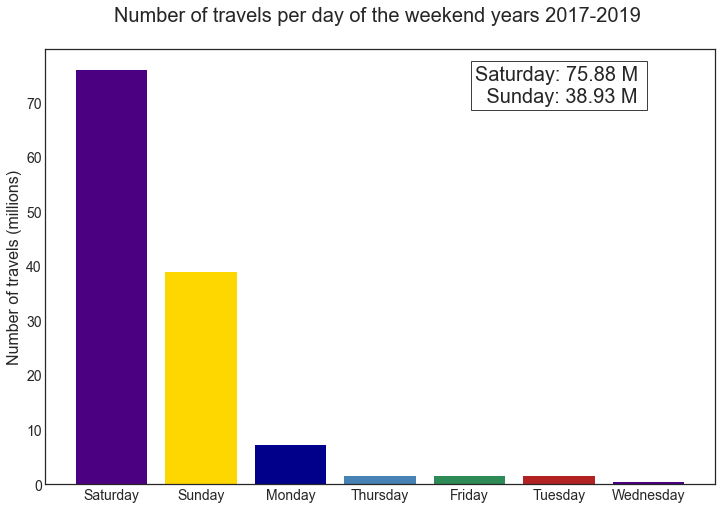

In [215]:
# Create the figure and the axis
fig, ax = plt.subplots(figsize = (12, 8))

# Graphics
plt.bar(total_weekend["Day"], total_weekend["Travels"], width = 0.8, align = "center", color = colors)

# Title, labels and limits of the axis "x" and "y"
plt.title("Number of travels per day of the weekend years 2017-2019 \n", fontsize = 20)
plt.ylabel("Number of travels (millions)", fontsize = 16)

# Ticks
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# Text
plt.text("Tuesday", 70, "Saturday: 75.88 M \n Sunday: 38.93 M", ha = "center", fontsize = 20, bbox = dict(facecolor = 'white', alpha = .75))

plt.show()

<a id='Number_of_travels_Rush_hour'></a>

### A.5 Number of travels: Rush hour

<a id='For_all_lines'></a>

#### A.5.1 For all lines

In [216]:
df_subway_weekday.head()

,fecha,year,month,desde,linea,estacion,total,weekday,linea_estacion,id_estacion,lat,long
1287,2017-01-02,2017,1,5.0,B,ANGEL GALLARDO,35.0,yes,B-ANGEL GALLARDO,135.0,-34.602047,-58.431351
1288,2017-01-02,2017,1,5.0,B,CALLAO,13.0,yes,B-CALLAO,112.0,-34.604352,-58.392879
1289,2017-01-02,2017,1,5.0,B,CARLOS GARDEL,17.0,yes,B-CARLOS GARDEL,127.0,-34.603999,-58.412041
1290,2017-01-02,2017,1,5.0,B,CARLOS PELLEGRINI,97.0,yes,B-CARLOS PELLEGRINI,103.0,-34.603939,-58.380852
1291,2017-01-02,2017,1,5.0,B,DORREGO,67.0,yes,B-DORREGO,143.0,-34.591439,-58.447711


In [217]:
df_subway_weekday_hour = df_subway_weekday.copy()

In [218]:
df_subway_weekday_hour.head()

,fecha,year,month,desde,linea,estacion,total,weekday,linea_estacion,id_estacion,lat,long
1287,2017-01-02,2017,1,5.0,B,ANGEL GALLARDO,35.0,yes,B-ANGEL GALLARDO,135.0,-34.602047,-58.431351
1288,2017-01-02,2017,1,5.0,B,CALLAO,13.0,yes,B-CALLAO,112.0,-34.604352,-58.392879
1289,2017-01-02,2017,1,5.0,B,CARLOS GARDEL,17.0,yes,B-CARLOS GARDEL,127.0,-34.603999,-58.412041
1290,2017-01-02,2017,1,5.0,B,CARLOS PELLEGRINI,97.0,yes,B-CARLOS PELLEGRINI,103.0,-34.603939,-58.380852
1291,2017-01-02,2017,1,5.0,B,DORREGO,67.0,yes,B-DORREGO,143.0,-34.591439,-58.447711


In [219]:
df_subway_weekday_hour = df_subway_weekday_hour.groupby("desde")[["total"]].sum()

In [220]:
df_subway_weekday_hour = df_subway_weekday_hour[5:24]

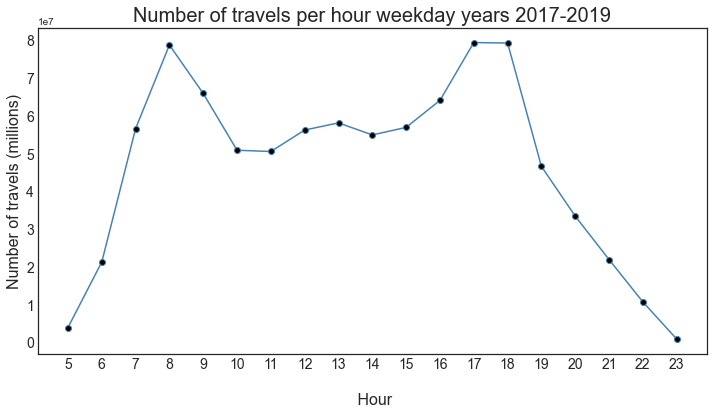

In [222]:
fig, ax = plt.subplots(figsize = (12, 6))

plt.plot(df_subway_weekday_hour.index, df_subway_weekday_hour["total"], "-", color = "steelblue", marker = "o", markerfacecolor = "black", markersize = 6)

lista = list(range(5,24,1))
list_string = map(str, lista)
labels = list(list_string)

plt.xticks(ticks = lista, labels = labels)

#ax.grid(axis = 'y')

plt.title("Number of travels per hour weekday years 2017-2019", fontsize = 20)
plt.ylabel("Number of travels (millions)", fontsize = 16)
plt.xlabel("\n Hour", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

It is clearly observed that there is an hourly variation, in this case in the accumulated of the three years. With a morning peak at 8:00 a.m. and an evening peak between 5:00 p.m. and 6:00 p.m.

<a id='For_each_station'></a>

#### A.5.2 For each station

In [223]:
weekday_19 = df_subway_weekday.groupby(weekday_2019["fecha"].dt.strftime('%m-%d'))["fecha"].count().shape[0]
weekday_18 = df_subway_weekday.groupby(weekday_2018["fecha"].dt.strftime('%m-%d'))["fecha"].count().shape[0]
weekday_17 = df_subway_weekday.groupby(weekday_2017["fecha"].dt.strftime('%m-%d'))["fecha"].count().shape[0]
weekday_t = weekday_19 + weekday_18 + weekday_17 

In [224]:
print(weekday_t)
print(weekday_19)
print(weekday_18)
print(weekday_17)

740
248
245
247


In [225]:
# It is grouped by `station` and then the top 10 regarding number of trips is shown.

top_stations = df_subway.groupby(["linea", "estacion"])[["total"]].sum().sort_values("total", ascending = False).reset_index().head(10)
top_stations = top_stations.rename(columns = {"linea": "Line", "estacion": "Station", "total": "Travels"})

In [226]:
stations_line = top_stations[["Line", "Station"]]
travels_weekday = top_stations["Travels"].apply(lambda x : "{:,}".format(x))

Table showing the 10 stations with the most trips

In [227]:
pd.concat([stations_line, travels_weekday], axis = 1).style.set_properties(**{'text-align': 'center'})                   

,Line,Station,Travels
0,C,CONSTITUCION,"71,428,586.0"
1,C,RETIRO,"35,307,312.0"
2,D,CONGRESO DE TUCUMAN,"31,642,713.0"
3,D,CATEDRAL,"28,890,572.0"
4,B,FEDERICO LACROZE,"27,771,492.0"
5,A,SAN PEDRITO,"25,751,703.0"
6,B,ROSAS,"25,237,594.0"
7,B,LEANDRO N. ALEM,"23,444,891.0"
8,B,CARLOS PELLEGRINI,"20,737,748.0"
9,B,FLORIDA,"18,605,122.0"


In [228]:
top_stations = top_stations.sort_values("Travels", ascending = True)

In [229]:
top_stations["Travels"] = (top_stations["Travels"] / 1000000).round(2)

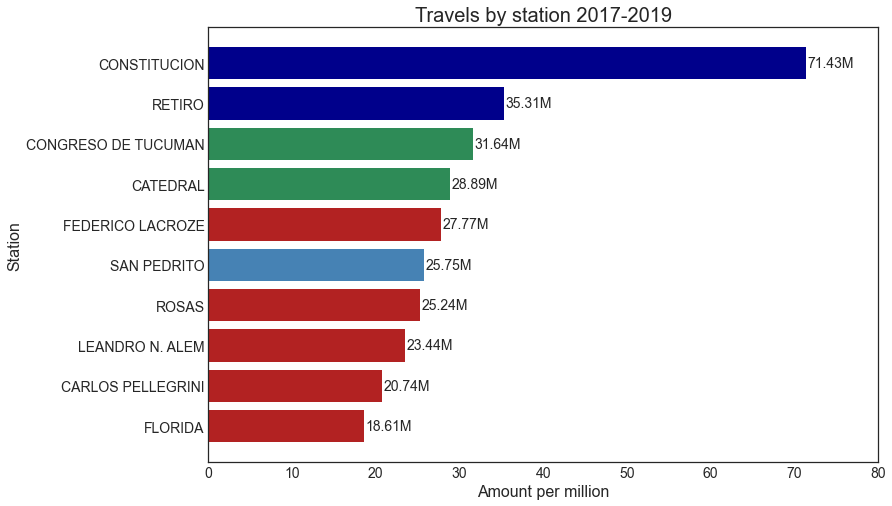

In [230]:
fig, ax = plt.subplots(figsize = (12, 8))

colors = ["firebrick", "firebrick", "firebrick", "firebrick", "steelblue", "firebrick", "seagreen", "seagreen", "darkblue", "darkblue"]
plt.barh(top_stations["Station"], top_stations["Travels"], height = 0.8, align = "center", color = colors)


#ax.grid(axis = 'x', linestyle = "--", alpha = 0.7)
plt.title("Travels by station 2017-2019", fontsize = 20)

plt.ylabel("Station", fontsize = 16)
plt.xlabel("Amount per million", fontsize = 16)

plt.xlim((0, 80))
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

for i, v in enumerate(sorted(top_stations["Travels"])):
    plt.text(v+0.2, i, str(round(v, 2)) + "M", fontsize = 14, va = "center")

plt.show()

It is observed that the stations that have connections with urban and inter-urban trains (Constitución, Retiro) concentrate the largest number of trips

<a id='Each_station_for_each_weekday'></a>

#### A.5.3 Each station for each weekday

In [231]:
top_stations_weekday = df_subway_weekday.groupby(["linea", "estacion"])[["total"]].sum().sort_values("total", ascending = False).reset_index().head(10)
top_stations_weekday = top_stations_weekday.rename(columns = {"linea": "Line", "estacion": "Station", "total": "Travels"})

To make these last three graphs, the metric `number of trips / number of weekdays` will be used.

In [232]:
print(f"Number of weekdays during the years 2017-2019: {weekday_t}.")

Number of weekdays during the years 2017-2019: 740.


In [233]:
top_stations_weekday["Travels"] = top_stations_weekday["Travels"] / weekday_t 

In [234]:
stations_line_weekday = top_stations_weekday[["Line", "Station"]]
travels_weekday = top_stations_weekday["Travels"].apply(lambda x : "{:,.2f}".format(x))

Table showing the 10 stations with the most trips per business day

In [235]:
pd.concat([stations_line_weekday, travels_weekday], axis = 1).style.set_properties(**{'text-align': 'center'})    

,Line,Station,Travels
0,C,CONSTITUCION,"82,267.22"
1,C,RETIRO,"40,658.00"
2,D,CONGRESO DE TUCUMAN,"37,948.20"
3,D,CATEDRAL,"36,798.40"
4,B,FEDERICO LACROZE,"32,650.32"
5,A,SAN PEDRITO,"30,390.55"
6,B,ROSAS,"29,949.10"
7,B,LEANDRO N. ALEM,"28,661.92"
8,B,CARLOS PELLEGRINI,"23,811.46"
9,B,FLORIDA,"23,369.85"


In [236]:
top_stations_weekday = top_stations_weekday.sort_values("Travels", ascending = True)

In [237]:
top_stations_weekday["Travels"] = (top_stations_weekday["Travels"] / 1000).round(2)

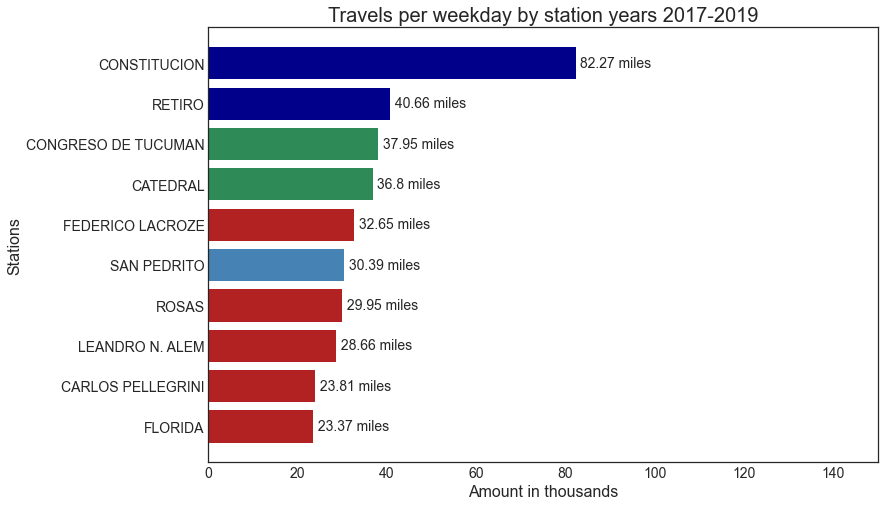

In [238]:
fig, ax = plt.subplots(figsize = (12, 8))

colors = ["firebrick", "firebrick", "firebrick", "firebrick", "steelblue", "firebrick", "seagreen", "seagreen", "darkblue", "darkblue"]
plt.barh(top_stations_weekday["Station"], top_stations_weekday["Travels"], height = 0.8, align = "center", color = colors)


#ax.grid(axis = 'x', linestyle = "--", alpha = 0.7)
plt.title("Travels per weekday by station years 2017-2019", fontsize = 20)

plt.ylabel("Stations", fontsize = 16)
plt.xlabel("Amount in thousands", fontsize = 16)

plt.xlim((0,150))
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

for i, v in enumerate(sorted(top_stations_weekday["Travels"])):
    plt.text(v+0.2, i, " " + str(round(v, 2)) + " miles", fontsize = 14, va = "center")

plt.show()

The same is repeated for business days, which is where there is the greatest demand for this transportation system.

<a id='Morning_rush_hour'></a>

#### A.5.4 Morning rush hour

In [239]:
df_subway_weekday.head()

,fecha,year,month,desde,linea,estacion,total,weekday,linea_estacion,id_estacion,lat,long
1287,2017-01-02,2017,1,5.0,B,ANGEL GALLARDO,35.0,yes,B-ANGEL GALLARDO,135.0,-34.602047,-58.431351
1288,2017-01-02,2017,1,5.0,B,CALLAO,13.0,yes,B-CALLAO,112.0,-34.604352,-58.392879
1289,2017-01-02,2017,1,5.0,B,CARLOS GARDEL,17.0,yes,B-CARLOS GARDEL,127.0,-34.603999,-58.412041
1290,2017-01-02,2017,1,5.0,B,CARLOS PELLEGRINI,97.0,yes,B-CARLOS PELLEGRINI,103.0,-34.603939,-58.380852
1291,2017-01-02,2017,1,5.0,B,DORREGO,67.0,yes,B-DORREGO,143.0,-34.591439,-58.447711


In [240]:
mask_morning = df_subway_weekday["desde"] == 8
morning = df_subway_weekday[mask_morning]

In [241]:
morning = morning.groupby(["linea", "estacion"])[["total"]].sum().sort_values("total", ascending = False).reset_index().head(10)
morning = morning.rename(columns = {"linea": "Line", "estacion": "Station", "total": "Travels"})

In [242]:
print(f"Number of weekdays between the years 2017-2019: {weekday_t}.")

Number of weekdays between the years 2017-2019: 740.


In [243]:
morning["Travels"] = (morning["Travels"] / weekday_t).round(2) 

In [244]:
morning

,Line,Station,Travels
0,C,CONSTITUCION,13080.93
1,D,CONGRESO DE TUCUMAN,5365.53
2,B,ROSAS,5310.06
3,A,SAN PEDRITO,5216.11
4,B,FEDERICO LACROZE,4986.85
5,C,RETIRO,3823.79
6,B,MALABIA,2303.80
7,A,FLORES,2274.02
8,H,HOSPITALES,2141.33
9,A,PRIMERA JUNTA,2074.04


In [245]:
stations_morning = morning[["Line", "Station"]]
treavels_weekday_morning = morning["Travels"].apply(lambda x : "{:,.2f}".format(x))

Table showing the 10 stations with the most trips per weekday during the morning rush hour

In [246]:
pd.concat([stations_morning, treavels_weekday_morning], axis = 1).style.set_properties(**{'text-align': 'center'})    

,Line,Station,Travels
0,C,CONSTITUCION,"13,080.93"
1,D,CONGRESO DE TUCUMAN,"5,365.53"
2,B,ROSAS,"5,310.06"
3,A,SAN PEDRITO,"5,216.11"
4,B,FEDERICO LACROZE,"4,986.85"
5,C,RETIRO,"3,823.79"
6,B,MALABIA,"2,303.80"
7,A,FLORES,"2,274.02"
8,H,HOSPITALES,"2,141.33"
9,A,PRIMERA JUNTA,"2,074.04"


In [247]:
morning = morning.sort_values("Travels", ascending = True)
morning

,Line,Station,Travels
9,A,PRIMERA JUNTA,2074.04
8,H,HOSPITALES,2141.33
7,A,FLORES,2274.02
6,B,MALABIA,2303.80
5,C,RETIRO,3823.79
4,B,FEDERICO LACROZE,4986.85
3,A,SAN PEDRITO,5216.11
2,B,ROSAS,5310.06
1,D,CONGRESO DE TUCUMAN,5365.53
0,C,CONSTITUCION,13080.93


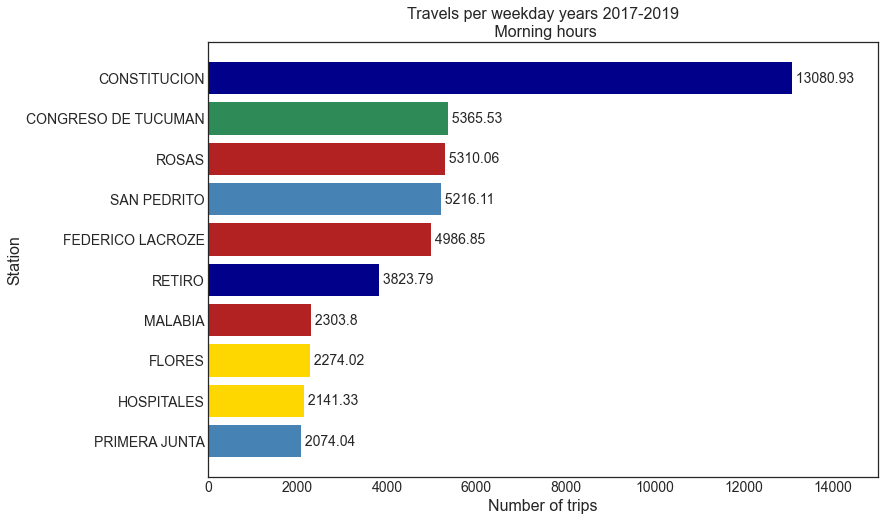

In [259]:
fig, ax = plt.subplots(figsize = (12, 8))

colors = ["steelblue", "gold", "gold", "firebrick", "darkblue", "firebrick", "steelblue", "firebrick", "seagreen", "darkblue"]
plt.barh(morning["Station"], morning["Travels"], height = 0.8, align = "center", color = colors)

plt.title("Travels per weekday years 2017-2019\n Morning hours", fontsize = 16)

plt.ylabel("Station", fontsize = 16)
plt.xlabel("Number of trips", fontsize = 16)

plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.xlim((0, 15000))

for i, v in enumerate(sorted(morning["Travels"])):
    plt.text(v+0.2, i, " " + str(round(v, 2)), fontsize = 14, va = "center")

plt.show()

In the morning segment there is a greater flow of trips in Constitución (connection from the train lines)

<a id='Evening_rush_hour'></a>

#### A.5.5 Evening rush hour

In [250]:
df_subway_weekday.head()

,fecha,year,month,desde,linea,estacion,total,weekday,linea_estacion,id_estacion,lat,long
1287,2017-01-02,2017,1,5.0,B,ANGEL GALLARDO,35.0,yes,B-ANGEL GALLARDO,135.0,-34.602047,-58.431351
1288,2017-01-02,2017,1,5.0,B,CALLAO,13.0,yes,B-CALLAO,112.0,-34.604352,-58.392879
1289,2017-01-02,2017,1,5.0,B,CARLOS GARDEL,17.0,yes,B-CARLOS GARDEL,127.0,-34.603999,-58.412041
1290,2017-01-02,2017,1,5.0,B,CARLOS PELLEGRINI,97.0,yes,B-CARLOS PELLEGRINI,103.0,-34.603939,-58.380852
1291,2017-01-02,2017,1,5.0,B,DORREGO,67.0,yes,B-DORREGO,143.0,-34.591439,-58.447711


In [251]:
mask_afternoon = (df_subway_weekday["desde"] == 18) | (df_subway_weekday["desde"] == 19)
afternoon = df_subway_weekday[mask_afternoon]

In [252]:
afternoon = afternoon.groupby(["linea", "estacion"])[["total"]].sum().sort_values("total", ascending = False).reset_index().head(10)
afternoon = afternoon.rename(columns = {"linea": "Line", "estacion": "Station", "total": "Travels"})

In [253]:
print(f"Number of weekdays during the years 2017-2019: {weekday_t}.")

Number of weekdays during the years 2017-2019: 740.


In [254]:
afternoon["Travels"] = (afternoon["Travels"] / weekday_t).round(2) 

In [255]:
stations_afternoon = afternoon[["Line", "Station"]]
travels_weekday_afternoon = afternoon["Travels"].apply(lambda x : "{:,.2f}".format(x))

Table showing the 10 stations with the most trips per business day during the evening rush hour

In [256]:
pd.concat([stations_afternoon, travels_weekday_afternoon], axis = 1).style.set_properties(**{'text-align': 'center'})  

,Line,Station,Travels
0,D,CATEDRAL,"9,230.22"
1,B,LEANDRO N. ALEM,"6,587.73"
2,C,RETIRO,"5,925.81"
3,B,FLORIDA,"5,760.67"
4,C,CONSTITUCION,"4,777.46"
5,B,CARLOS PELLEGRINI,"4,515.43"
6,D,CONGRESO DE TUCUMAN,"4,477.71"
7,A,PERU,"4,182.00"
8,A,PLAZA DE MAYO,"4,059.28"
9,E,BOLIVAR,"3,805.29"


In [257]:
afternoon = afternoon.sort_values("Travels", ascending = True)
afternoon

,Line,Station,Travels
9,E,BOLIVAR,3805.29
8,A,PLAZA DE MAYO,4059.28
7,A,PERU,4182.00
6,D,CONGRESO DE TUCUMAN,4477.71
5,B,CARLOS PELLEGRINI,4515.43
4,C,CONSTITUCION,4777.46
3,B,FLORIDA,5760.67
2,C,RETIRO,5925.81
1,B,LEANDRO N. ALEM,6587.73
0,D,CATEDRAL,9230.22


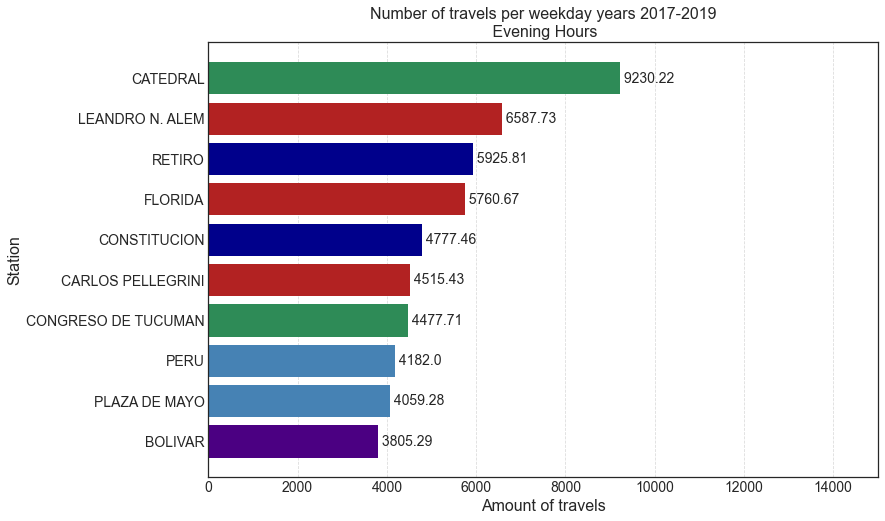

In [258]:
fig, ax = plt.subplots(figsize = (12, 8))

colors = ["indigo", "steelblue", "steelblue", "seagreen", "firebrick", "darkblue", "firebrick", "darkblue", "firebrick", "seagreen"]
plt.barh(afternoon["Station"], afternoon["Travels"], height = 0.8, align = "center", color = colors)


ax.grid(axis = 'x', linestyle = "--", alpha = 0.7)
plt.title("Number of travels per weekday years 2017-2019\n Evening Hours", fontsize = 16)

plt.ylabel("Station", fontsize = 16)
plt.xlabel("Amount of travels", fontsize = 16)

plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.xlim((0, 15000))

for i, v in enumerate(sorted(afternoon["Travels"])):
    plt.text(v+0.2, i, " " + str(round(v, 2)), fontsize = 14, va = "center")

plt.show()

Being in the evening segment from the city center to the downtwon

<a id='General_analysis_of_precipitations'></a>

---

 ## B. General analysis of precipitations

<a id='Precipitations per year'></a>

### B.1 Precipitations per year

In [260]:
df_weather_year = df_weather.groupby(["year"]).sum().reset_index()
df_weather_year

,year,PRCP,TAVG,TMAX,TMIN,month
0,2017,118.67,6843.22,4948.26,4837.13,2382
1,2018,145.09,6752.75,4573.35,5008.27,2373
2,2019,31.19,6793.85,4173.85,4747.15,2382


In [261]:
total_year

,year,total
0,2017,328.70
1,2018,348.40
2,2019,341.34


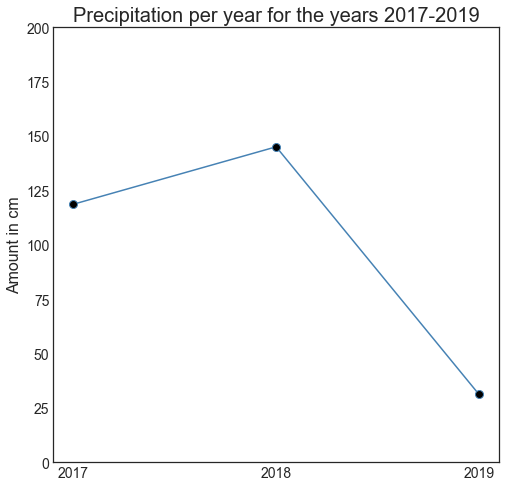

In [262]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.plot(df_weather_year["year"], df_weather_year["PRCP"], linestyle = "-", color = "steelblue", marker = "o", markersize = 8, markerfacecolor = "black")

x = ["2017", "2018", "2019"]

plt.title("Precipitation per year for the years 2017-2019", fontsize = 20)
plt.ylabel("Amount in cm", fontsize = 16)

plt.xticks(ticks = [2017,2018,2019], labels = x, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(0,200)

plt.show()

<a id='Precipitations per month'></a>

### B.2 Precipitations per month

In [263]:
df_weather_month = df_weather.groupby(["month"]).sum().reset_index()
df_weather_month

,month,PRCP,TAVG,TMAX,TMIN,year
0,1,25.22,2362.21,1526.08,1809.97,187674
1,2,22.23,2077.75,1329.44,1648.29,169512
2,3,14.30,2021.64,1454.46,1525.55,187674
3,4,39.31,1776.11,1202.21,1347.78,181620
4,5,34.91,1474.44,1107.19,1089.94,187674
5,6,8.22,1155.05,907.80,694.48,181620
6,7,29.95,1088.36,742.79,649.99,187674
7,8,12.74,1228.86,897.78,701.07,187674
8,9,29.64,1428.83,954.98,1001.13,179602
9,10,16.77,1653.87,1020.52,1190.55,187674


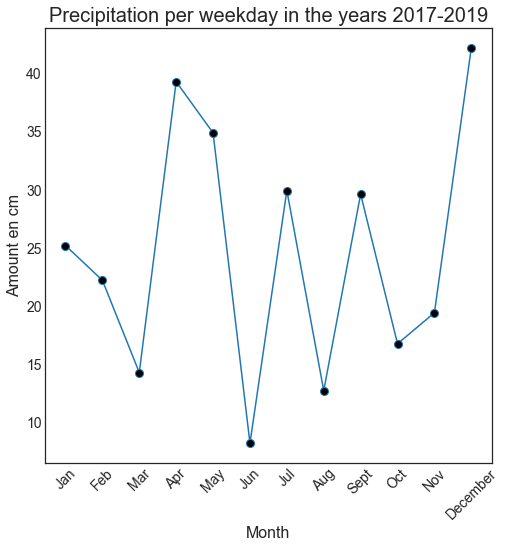

In [265]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.plot(df_weather_month["month"], df_weather_month["PRCP"], linestyle = "-", marker = "o", markersize = 8, markerfacecolor = "black")

numbers_month = [1,2,3,4,5,6,7,8,9,10,11,12]
names_month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "December"]

plt.title("Precipitation per weekday in the years 2017-2019", fontsize = 20)
plt.ylabel("Amount en cm", fontsize = 16)
plt.xlabel("Month", fontsize = 16)
plt.xticks(numbers_month, names_month, rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

<a id='Correlation_analysis'></a>

---

# 7. Correlation analysis

In [266]:
# Preparation of datafremes for visual correlation analysis

df_subway_weather = pd.merge(df_subway,df_weather, left_on = "fecha", right_on = "DATE")

In [267]:
df_subway_weather["dia"] = df_subway_weather["fecha"].dt.day_name()
df_subway_weather.head()

,fecha,year_x,month_x,desde,linea,estacion,total,weekday_x,linea_estacion,id_estacion,...,long,DATE,PRCP,TAVG,TMAX,TMIN,year_y,month_y,weekday_y,dia
0,2017-01-01,2017,1,8.0,B,ANGEL GALLARDO,41.0,no,B-ANGEL GALLARDO,135.0,...,-58.431351,2017-01-01,0.0,30.56,NaN,27.22,2017,1,no,Sunday
1,2017-01-01,2017,1,8.0,B,CALLAO,25.0,no,B-CALLAO,112.0,...,-58.392879,2017-01-01,0.0,30.56,NaN,27.22,2017,1,no,Sunday
2,2017-01-01,2017,1,8.0,B,CARLOS GARDEL,29.0,no,B-CARLOS GARDEL,127.0,...,-58.412041,2017-01-01,0.0,30.56,NaN,27.22,2017,1,no,Sunday
3,2017-01-01,2017,1,8.0,B,CARLOS PELLEGRINI,66.0,no,B-CARLOS PELLEGRINI,103.0,...,-58.380852,2017-01-01,0.0,30.56,NaN,27.22,2017,1,no,Sunday
4,2017-01-01,2017,1,8.0,B,DORREGO,36.0,no,B-DORREGO,143.0,...,-58.447711,2017-01-01,0.0,30.56,NaN,27.22,2017,1,no,Sunday


In [268]:
df_subway_weather_J = df_subway_weather.set_index(["fecha", "estacion"])
df_subway_weather_J.sort_values(by = ["fecha", "estacion", "desde"], inplace = True)
df_subway_weather_J.head()

year_x  month_x  desde linea  total weekday_x  \
fecha      estacion                                                    
2017-01-01 9 DE JULIO    2017        1    8.0     D   13.0        no   
           9 DE JULIO    2017        1    9.0     D    9.0        no   
           9 DE JULIO    2017        1   10.0     D   29.0        no   
           9 DE JULIO    2017        1   11.0     D   24.0        no   
           9 DE JULIO    2017        1   12.0     D   38.0        no   

                      linea_estacion  id_estacion       lat       long  \
fecha      estacion                                                      
2017-01-01 9 DE JULIO   D-9 DE JULIO        204.0 -34.60447 -58.380464   
           9 DE JULIO   D-9 DE JULIO        204.0 -34.60447 -58.380464   
           9 DE JULIO   D-9 DE JULIO        204.0 -34.60447 -58.380464   
           9 DE JULIO   D-9 DE JULIO        204.0 -34.60447 -58.380464   
           9 DE JULIO   D-9 DE JULIO        204.0 -34.60447 -58.380464   

                            DATE  PRCP   TAVG  TMAX   TMIN  year_y  month_y  \
fecha      estacion                                                           
2017-01-01 9 DE JULIO 2017-01-01   0.0  30.56   NaN  27.22    2017        1   
           9 DE JULIO 2017-01-01   0.0  30.56   NaN  27.22    2017        1   
           9 DE JULIO 2017-01-01   0.0  30.56   NaN  27.22    2017        1   
           9 DE JULIO 2017-01-01   0.0  30.56   NaN  27.22    2017        1   
           9 DE JULIO 2017-01-01   0.0  30.56   NaN  27.22    2017        1   

                      weekday_y     dia  
fecha      estacion                      
2017-01-01 9 DE JULIO        no  Sunday  
           9 DE JULIO        no  Sunday  
           9 DE JULIO        no  Sunday  
           9 DE JULIO        no  Sunday  
           9 DE JULIO        no  Sunday

<a id='Correlation_between_all_dataframe_variables'></a>

## A. Correlation between all dataframe variables

Correlation between rainfall and trips to see if there is a decrease (or at least some variation) between trips and rainy days

In [269]:
df_subway_weather_corr = df_subway_weather.drop(["year_y", "month_y", "weekday_y", "DATE", "lat", "long", "id_estacion"], axis = 1)

In [270]:
corr = df_subway_weather_corr.dropna().corr(method = 'pearson')

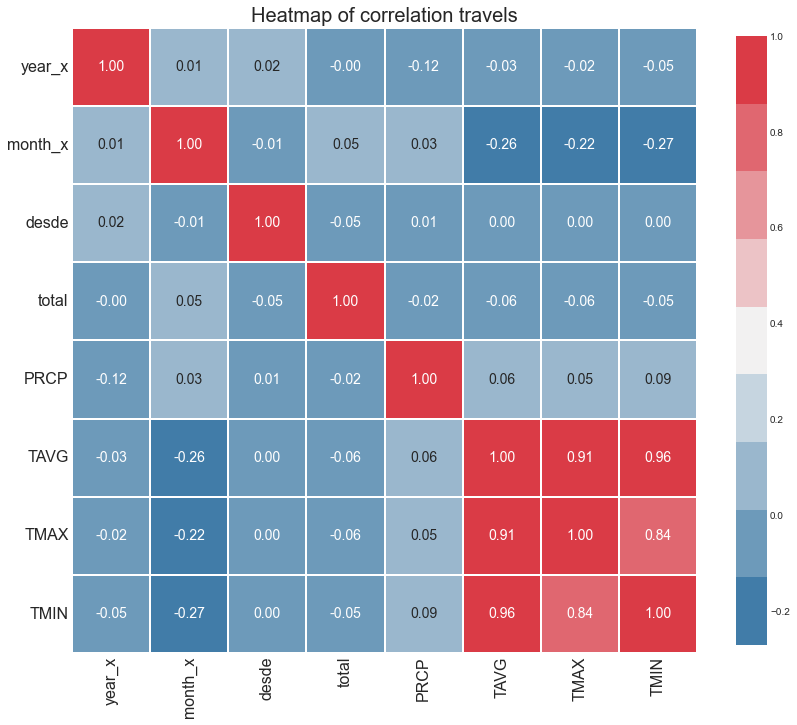

In [271]:
fig, ax = plt.subplots(figsize = (14, 14))

cmap = sns.diverging_palette(240, 10, n = 9, center = "light")

sns.heatmap(corr, linewidths =.2, cmap = cmap, cbar_kws = {"shrink": .8}, square = True, xticklabels = True, yticklabels = True, annot = True, annot_kws = {'size': 14}, fmt = '.2f');

plt.title("Heatmap of correlation travels", fontsize = 20)
plt.yticks(fontsize =  16, rotation = 0) 
plt.xticks(fontsize = 16, rotation = 90)

plt.show()

The correlation between `PRCP` (precipitations) and `total` (travels) is observed, observing a correlation of -0.01 which is not significant

<a id='Correlation_between_total_trips_and_the_rest_of_the_numerical_variables'></a>

## B. Correlation between  total trips and the rest of the numerical variables

In [272]:
corr = df_subway_weather_corr.dropna().corr(method = "pearson")[["total"]].sort_values(by = "total", ascending = False)

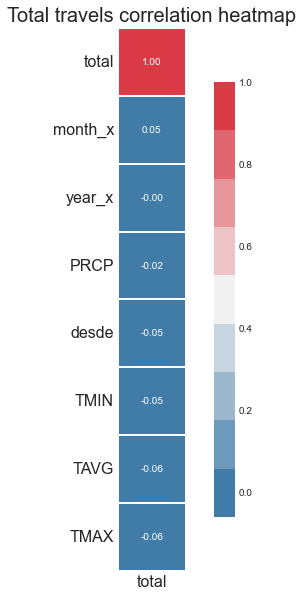

In [273]:
fig, ax = plt.subplots(figsize = (10, 10))

cmap = sns.diverging_palette(240, 10, n = 9, center = "light")

sns.heatmap(corr, linewidths =.2, cmap = cmap, cbar_kws = {"shrink": .8}, square = True, xticklabels = True, yticklabels = True, annot = True, annot_kws = {'size': 10}, fmt = '.2f');

plt.title("Total travels correlation heatmap", fontsize = 20)
plt.yticks(fontsize =  16, rotation = 0) 
plt.xticks(fontsize = 16, rotation = 0)

plt.show()

- In the Heatmaps it can be seen that there is no relevant correlation in the data

- Total trips would not depend on rainfall

In [274]:
df_subway_weather_station = df_subway_weather.set_index(["estacion", "fecha"])
df_subway_weather_station.sort_values(by = ["estacion", "fecha", "desde"], inplace = True)
df_subway_weather_station. head()

year_x  month_x  desde linea  total weekday_x  \
estacion   fecha                                                       
9 DE JULIO 2017-01-01    2017        1    8.0     D   13.0        no   
           2017-01-01    2017        1    9.0     D    9.0        no   
           2017-01-01    2017        1   10.0     D   29.0        no   
           2017-01-01    2017        1   11.0     D   24.0        no   
           2017-01-01    2017        1   12.0     D   38.0        no   

                      linea_estacion  id_estacion       lat       long  \
estacion   fecha                                                         
9 DE JULIO 2017-01-01   D-9 DE JULIO        204.0 -34.60447 -58.380464   
           2017-01-01   D-9 DE JULIO        204.0 -34.60447 -58.380464   
           2017-01-01   D-9 DE JULIO        204.0 -34.60447 -58.380464   
           2017-01-01   D-9 DE JULIO        204.0 -34.60447 -58.380464   
           2017-01-01   D-9 DE JULIO        204.0 -34.60447 -58.380464   

                            DATE  PRCP   TAVG  TMAX   TMIN  year_y  month_y  \
estacion   fecha                                                              
9 DE JULIO 2017-01-01 2017-01-01   0.0  30.56   NaN  27.22    2017        1   
           2017-01-01 2017-01-01   0.0  30.56   NaN  27.22    2017        1   
           2017-01-01 2017-01-01   0.0  30.56   NaN  27.22    2017        1   
           2017-01-01 2017-01-01   0.0  30.56   NaN  27.22    2017        1   
           2017-01-01 2017-01-01   0.0  30.56   NaN  27.22    2017        1   

                      weekday_y     dia  
estacion   fecha                         
9 DE JULIO 2017-01-01        no  Sunday  
           2017-01-01        no  Sunday  
           2017-01-01        no  Sunday  
           2017-01-01        no  Sunday  
           2017-01-01        no  Sunday

<a id='Corr_Constitucion'></a>

## C. Correlation between  with that has the highest flow of trips: Constitucion

In [275]:
df_subway_weather_station = df_subway_weather_station.drop(["year_y", "month_y", "weekday_y", "DATE", "lat", "long", "id_estacion"], axis = 1)

In [276]:
constitucion = df_subway_weather_station.loc[("CONSTITUCION")].reset_index()

In [277]:
corr_constitucion = constitucion.dropna().corr(method = 'pearson')

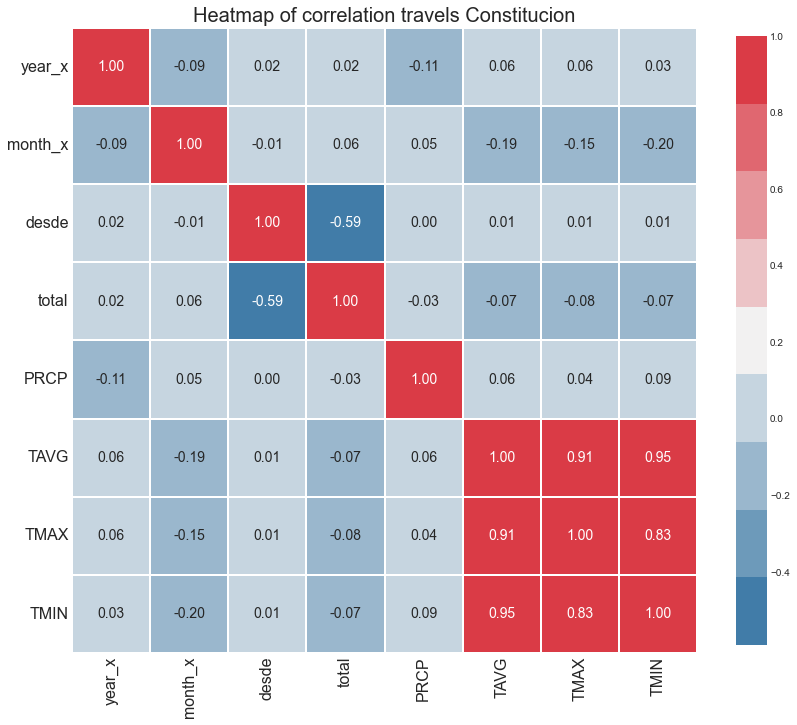

In [278]:
fig, ax = plt.subplots(figsize = (14, 14))

cmap = sns.diverging_palette(240, 10, n = 9, center = "light")

sns.heatmap(corr_constitucion, linewidths =.2, cmap = cmap, cbar_kws = {"shrink": .8}, square = True, xticklabels = True, yticklabels = True, annot = True, annot_kws = {'size': 14}, fmt = '.2f');

plt.title("Heatmap of correlation travels Constitucion", fontsize = 20)
plt.yticks(fontsize =  16, rotation = 0) 
plt.xticks(fontsize = 16, rotation = 90)

plt.show()

Again the correlation was -0.03, not being significant

<a id='Correlation_with_scatterplot'></a>

## D. Correlation with scatter plot

In [279]:
df_weather['PRCP'].describe()

count    1094.000000
mean        0.269607
std         1.002364
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.800000
Name: PRCP, dtype: float64

In [280]:
df_weather["year"] = df_weather["DATE"].dt.year
df_weather["month"] = df_weather["DATE"].dt.month

In [281]:
precip = df_weather[["DATE", "PRCP"]]

In [282]:
# The total number of trips is used and a grouping by date is performed

travels_t = df_subway.groupby(["fecha"], as_index = False)["total"]. sum()

In [283]:
precip_travels = pd.concat([precip, travels_t], axis = 1)

Correlation between trips and global precipitations

In [284]:
stat, p = stats.spearmanr(precip_travels["total"], precip_travels["PRCP"], nan_policy = "omit")
print(f"The value of the statistic is: {stat}, and the p value is {p}")
if p < 0.05:
  print ("There is a statistically significant difference since p < 0.05")
else:
  print ("There is no significant difference since p > 0.05")

The value of the statistic is: -0.03830883155714741, and the p value is 0.2058906768837438
There is no significant difference since p > 0.05


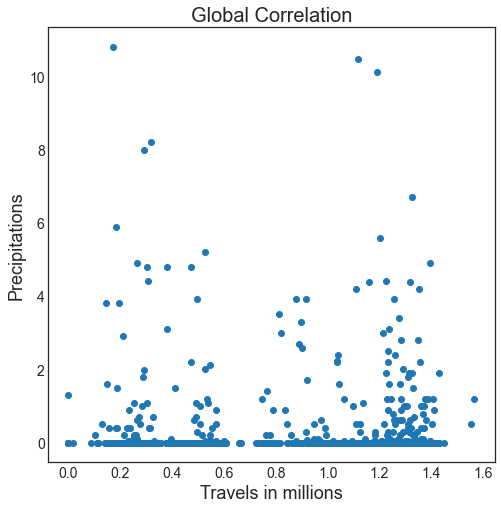

In [285]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(precip_travels["total"] / 1000000, precip_travels["PRCP"])

plt.title("Global Correlation", fontsize = 20)
plt.xlabel("Travels in millions", fontsize = 18)
plt.ylabel("Precipitations", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

Subway trips would not depend on the rains

In [286]:
from sklearn.preprocessing import StandardScaler

In [287]:
scaler = StandardScaler()

In [288]:
scaler.fit(precip_travels[["PRCP", "total"]].dropna())

StandardScaler()

In [289]:
precip_travels_std = scaler.transform(precip_travels[["PRCP", "total"]])

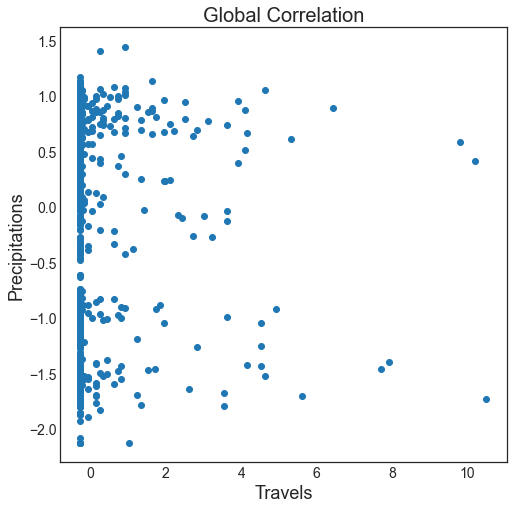

In [290]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(precip_travels_std[:, 0], precip_travels_std[:, 1])

plt.title("Global Correlation", fontsize = 20)
plt.xlabel("Travels", fontsize = 18)
plt.ylabel("Precipitations", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

<a id='Conclusion'></a>

---

# 8. Conclusion

- Based on the analyzed data, it can be concluded that the proposed hypothesis is FALSE, since an increase in PAX due to precipitation could not be evidenced. This indicates that the services provided to PAX on rainy days should not be modified.

- In the exploration of the data, it was possible to show the movements of passengers throughout the day, as well as the evolution of the passengers transported throughout the year, in addition to their distribution by the different lines and stations.

- The main difficulty of the analysis lay in the depth established, due to the amount of data handled and their variables.